# Exploratory Data Analysis

---
### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [31]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Explore the dataset to identify which variables are relevant in predicting whether a game is good (based on its `positive_ratio`).

In [32]:
data = pd.read_csv('cleaned.csv')
data

,Unnamed: 0,name,achievements,average_playtime,median_playtime,owners,price,detailed_description,platforms_windows,platforms_mac,...,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial,age,positive_ratio
0,0,Counter-Strike,0,17612,317,15000000,7.19,Play the world's number 1 online action game. ...,1,1,...,0,0,0,0,0,0,0,0,7000,0.973888
1,1,Team Fortress Classic,0,277,62,7500000,3.99,One of the most popular online action games of...,1,1,...,0,0,0,0,0,0,0,0,7580,0.839787
2,2,Day of Defeat,0,187,34,7500000,3.99,Enlist in an intense brand of Axis vs. Allied ...,1,1,...,0,0,0,0,0,0,0,0,6089,0.895648
3,3,Deathmatch Classic,0,258,184,7500000,3.99,Enjoy fast-paced multiplayer gaming with Death...,1,1,...,0,0,0,0,0,0,0,0,6788,0.826623
4,4,Half-Life: Opposing Force,0,624,415,7500000,3.99,Return to the Black Mesa Research Facility as ...,1,1,...,0,0,0,0,0,0,0,0,7366,0.947996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15035,27027,Border Officer,12,0,0,10000,7.19,Usually everyone is unemployed here. But by ch...,1,0,...,0,0,0,0,0,0,0,0,260,0.714286
15036,27030,Geometry May. I swear it's a nice free game,7,0,0,10000,0.00,"Hi, guys, it's me again. Check out my new game...",1,0,...,0,0,0,0,0,0,0,0,260,0.846939
15037,27034,Sin Slayers: The First Sin,0,0,0,35000,0.00,Sin Slayers: The First Sin is a free demo of S...,1,0,...,0,0,0,0,0,0,0,0,265,0.776923
15038,27039,A Legionary's Life,23,0,0,10000,6.10,This is a unique single-player game with RPG e...,1,0,...,0,0,0,0,0,0,0,0,257,0.733333


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             15040 non-null  int64  
 1   name                                   15040 non-null  object 
 2   achievements                           15040 non-null  int64  
 3   average_playtime                       15040 non-null  int64  
 4   median_playtime                        15040 non-null  int64  
 5   owners                                 15040 non-null  int64  
 6   price                                  15040 non-null  float64
 7   detailed_description                   15040 non-null  object 
 8   platforms_windows                      15040 non-null  int64  
 9   platforms_mac                          15040 non-null  int64  
 10  platforms_linux                        15040 non-null  int64  
 11  ca

There are 71 variables and 15040 entries. All the entries are non-null.

In [34]:
for col in data:
    print(col, ":", data[col].nunique())

Unnamed: 0 : 15040
name : 15029
achievements : 357
average_playtime : 1324
median_playtime : 1289
owners : 13
price : 220
detailed_description : 14998
platforms_windows : 2
platforms_mac : 2
platforms_linux : 2
categories_Multi-player : 2
categories_Online Multi-Player : 2
categories_Local Multi-Player : 2
categories_Valve Anti-Cheat enabled : 2
categories_Single-player : 2
categories_Steam Cloud : 2
categories_Steam Achievements : 2
categories_Steam Trading Cards : 2
categories_Captions available : 2
categories_Partial Controller Support : 2
categories_Includes Source SDK : 2
categories_Cross-Platform Multiplayer : 2
categories_Stats : 2
categories_Commentary available : 2
categories_Includes level editor : 2
categories_Steam Workshop : 2
categories_In-App Purchases : 2
categories_Co-op : 2
categories_Full controller support : 2
categories_Steam Leaderboards : 2
categories_SteamVR Collectibles : 2
categories_Online Co-op : 2
categories_Shared/Split Screen : 2
categories_Local Co-op : 

Description of the dataset:  
> **name**: Title of the game  
> **achievements**: Number of in-game achievements  
> **average_playtime**: Average user playtime  
> **median_playtime**: Median user playtime  
> **owners**: Estimated number of owners  
> **price**: Price of the game in GBP  
> **detailed_description**: Description about the game  
> **platforms_windows**: Whether the game is available on Windows  
> **platforms_mac**: Whether the game is available on Mac  
> **platforms_linux**: Whether the game is avaible on Linux  
> **categories_[category]**: Whether the game is of the category  
> **genres_[genre]**: Whether the game is of the genre  
> **age**: Number of days since release date until 2020 Jan 1  
> **positive_ratio**: Ratio of positive ratings to all ratings

The first column (ID) and `name` are unique for each entry, so they are not relevant variables. Drop them from the DataFrame.

In [35]:
data = data.drop([data.columns[0], 'name'], axis = 1)
data.head()

,achievements,average_playtime,median_playtime,owners,price,detailed_description,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,...,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial,age,positive_ratio
0,0,17612,317,15000000,7.19,Play the world's number 1 online action game. ...,1,1,1,1,...,0,0,0,0,0,0,0,0,7000,0.973888
1,0,277,62,7500000,3.99,One of the most popular online action games of...,1,1,1,1,...,0,0,0,0,0,0,0,0,7580,0.839787
2,0,187,34,7500000,3.99,Enlist in an intense brand of Axis vs. Allied ...,1,1,1,1,...,0,0,0,0,0,0,0,0,6089,0.895648
3,0,258,184,7500000,3.99,Enjoy fast-paced multiplayer gaming with Death...,1,1,1,1,...,0,0,0,0,0,0,0,0,6788,0.826623
4,0,624,415,7500000,3.99,Return to the Black Mesa Research Facility as ...,1,1,1,1,...,0,0,0,0,0,0,0,0,7366,0.947996


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 69 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   achievements                           15040 non-null  int64  
 1   average_playtime                       15040 non-null  int64  
 2   median_playtime                        15040 non-null  int64  
 3   owners                                 15040 non-null  int64  
 4   price                                  15040 non-null  float64
 5   detailed_description                   15040 non-null  object 
 6   platforms_windows                      15040 non-null  int64  
 7   platforms_mac                          15040 non-null  int64  
 8   platforms_linux                        15040 non-null  int64  
 9   categories_Multi-player                15040 non-null  int64  
 10  categories_Online Multi-Player         15040 non-null  int64  
 11  ca

**Numeric Variables** : `achievements`, `average_playtime`, `median_playtime`, `owners`, `price`, `age`, `positive_ratio`  
**Categorical Variables** : `platforms_windows`, `platforms_mac`, `platforms_linux`, `categories_[category]`, `genres_[genre]`

---

## Analysis of Numeric Variables  
Extract the numeric variables from the dataset.

In [37]:
dataNum = pd.DataFrame(data[['achievements', 'average_playtime', 'median_playtime', 'owners', 'price', 'age', 'positive_ratio']])
dataNum

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
0,0,17612,317,15000000,7.19,7000,0.973888
1,0,277,62,7500000,3.99,7580,0.839787
2,0,187,34,7500000,3.99,6089,0.895648
3,0,258,184,7500000,3.99,6788,0.826623
4,0,624,415,7500000,3.99,7366,0.947996
...,...,...,...,...,...,...,...
15035,12,0,0,10000,7.19,260,0.714286
15036,7,0,0,10000,0.00,260,0.846939
15037,0,0,0,35000,0.00,265,0.776923
15038,23,0,0,10000,6.10,257,0.733333


In [38]:
dataNum.describe()

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
count,15040.000000,15040.000000,15040.000000,1.504000e+04,15040.000000,15040.000000,15040.000000
mean,58.929255,258.967952,250.955386,2.282473e+05,7.134501,1356.631915,0.734720
std,404.266129,2417.094048,3097.676257,1.773139e+06,7.959682,872.222162,0.180515
min,0.000000,0.000000,0.000000,1.000000e+04,0.000000,245.000000,0.011765
25%,0.000000,0.000000,0.000000,1.000000e+04,1.690000,749.000000,0.629255
50%,12.000000,0.000000,0.000000,3.500000e+04,4.990000,1176.000000,0.772727
75%,30.000000,145.000000,149.000000,7.500000e+04,9.990000,1706.000000,0.877551
max,9821.000000,190625.000000,190625.000000,1.500000e+08,154.990000,8220.000000,1.000000


---

### Uni-Variate Analysis

Visualize the uni-variate distributions of each of the variables independently.

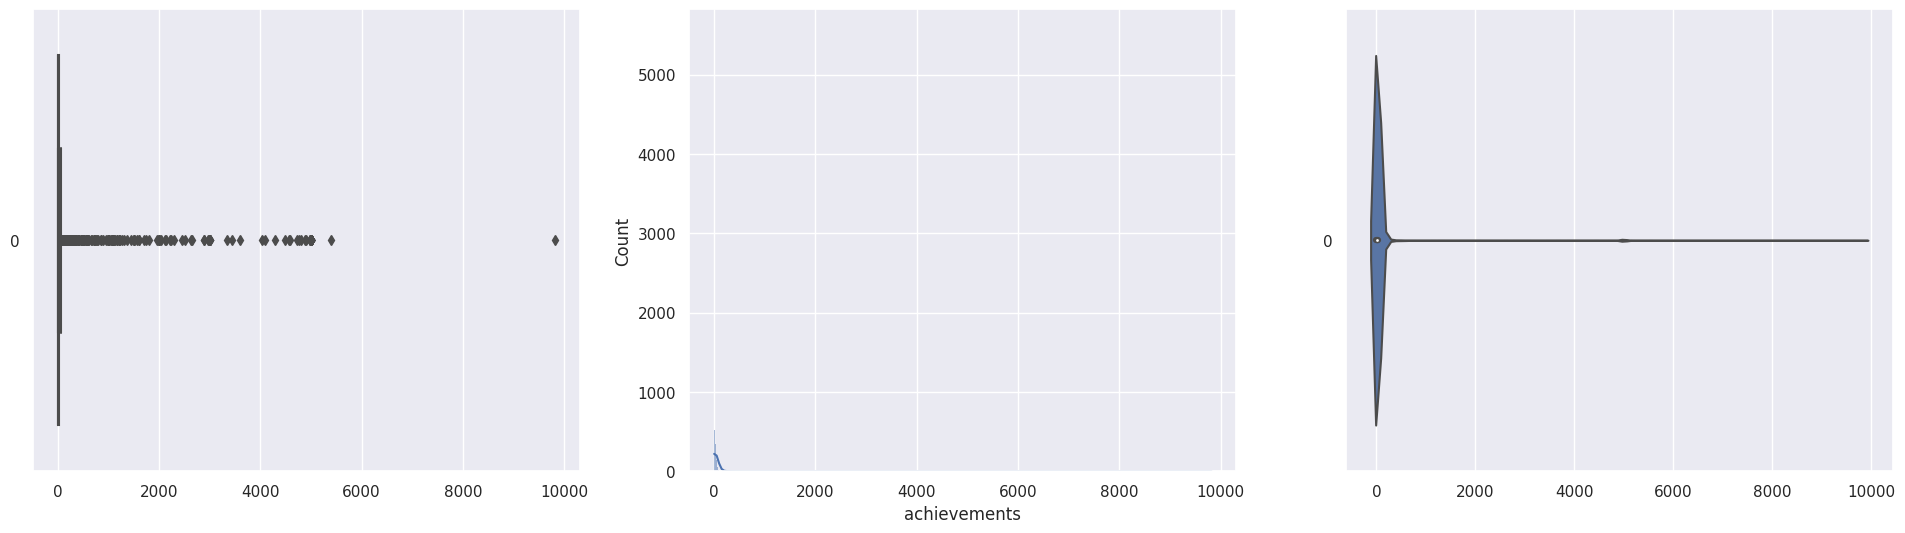

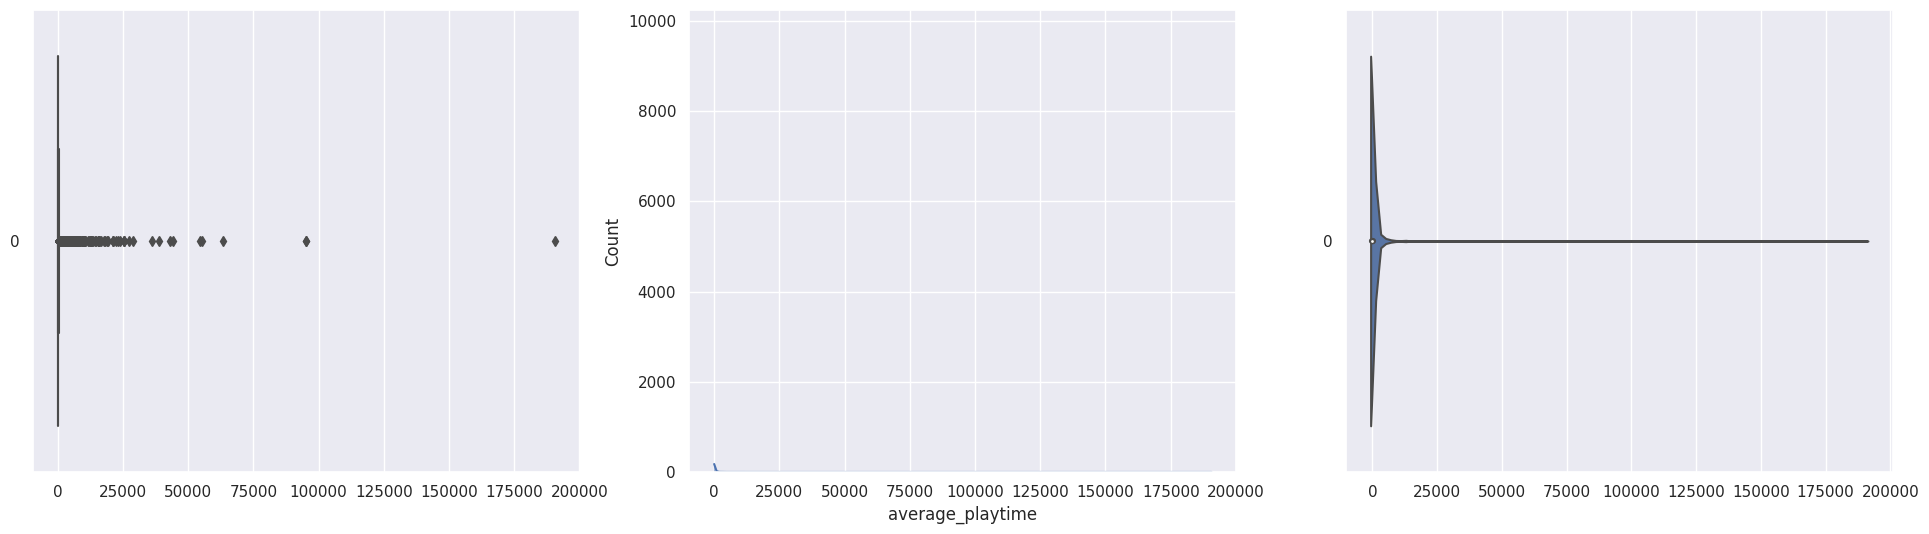

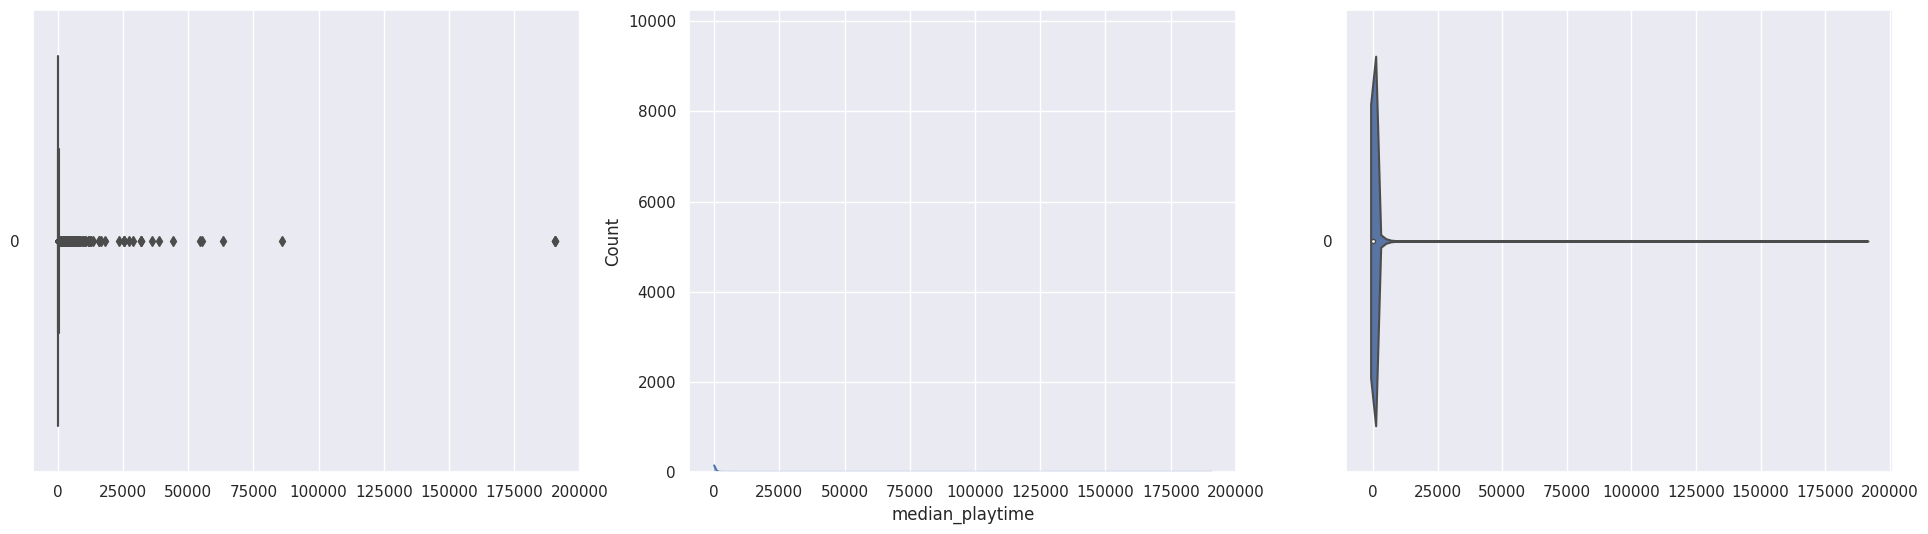

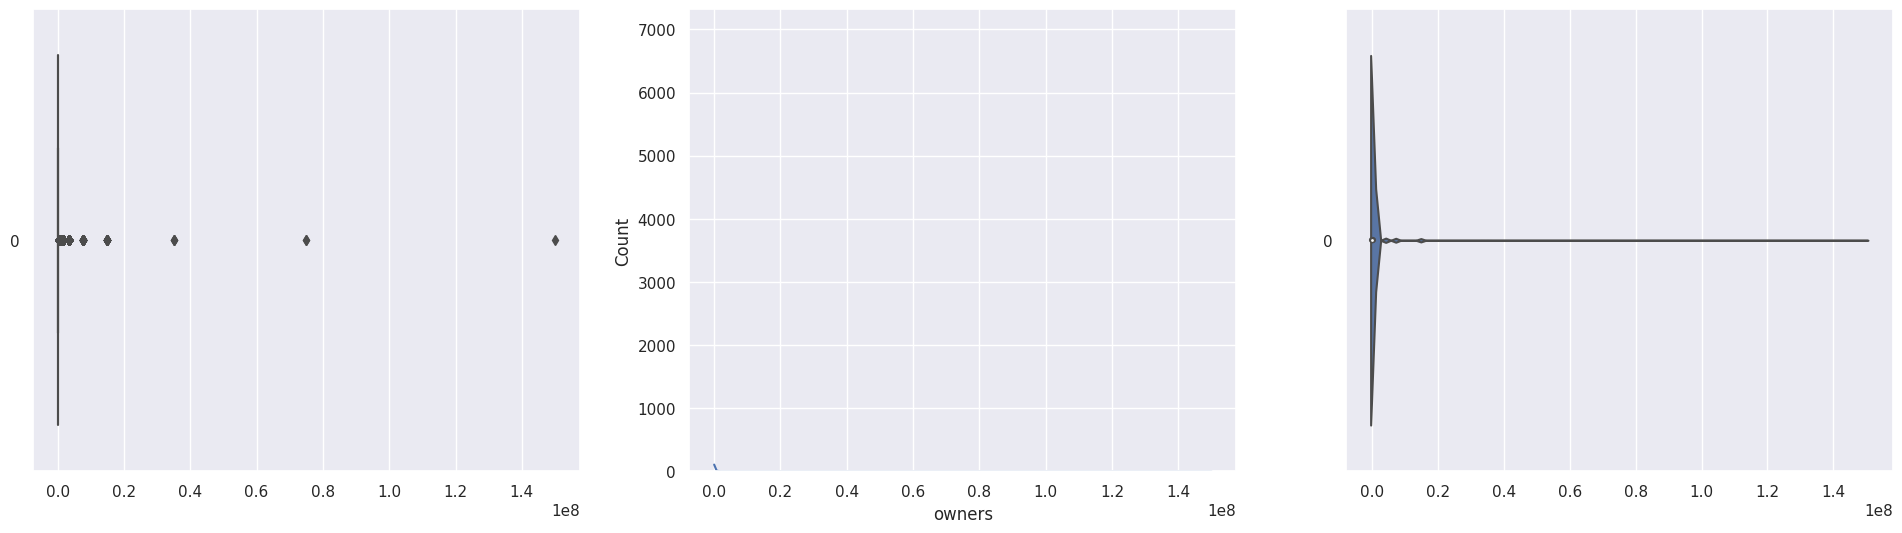

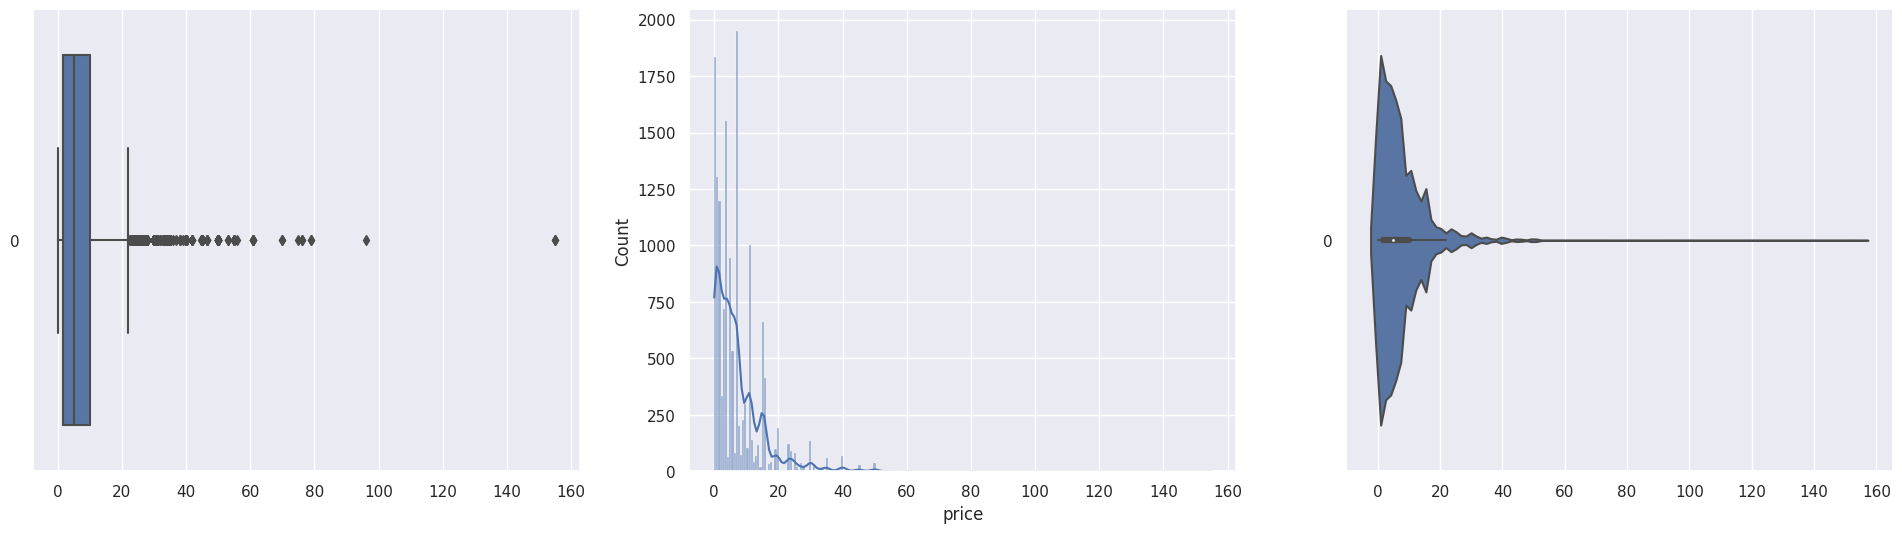

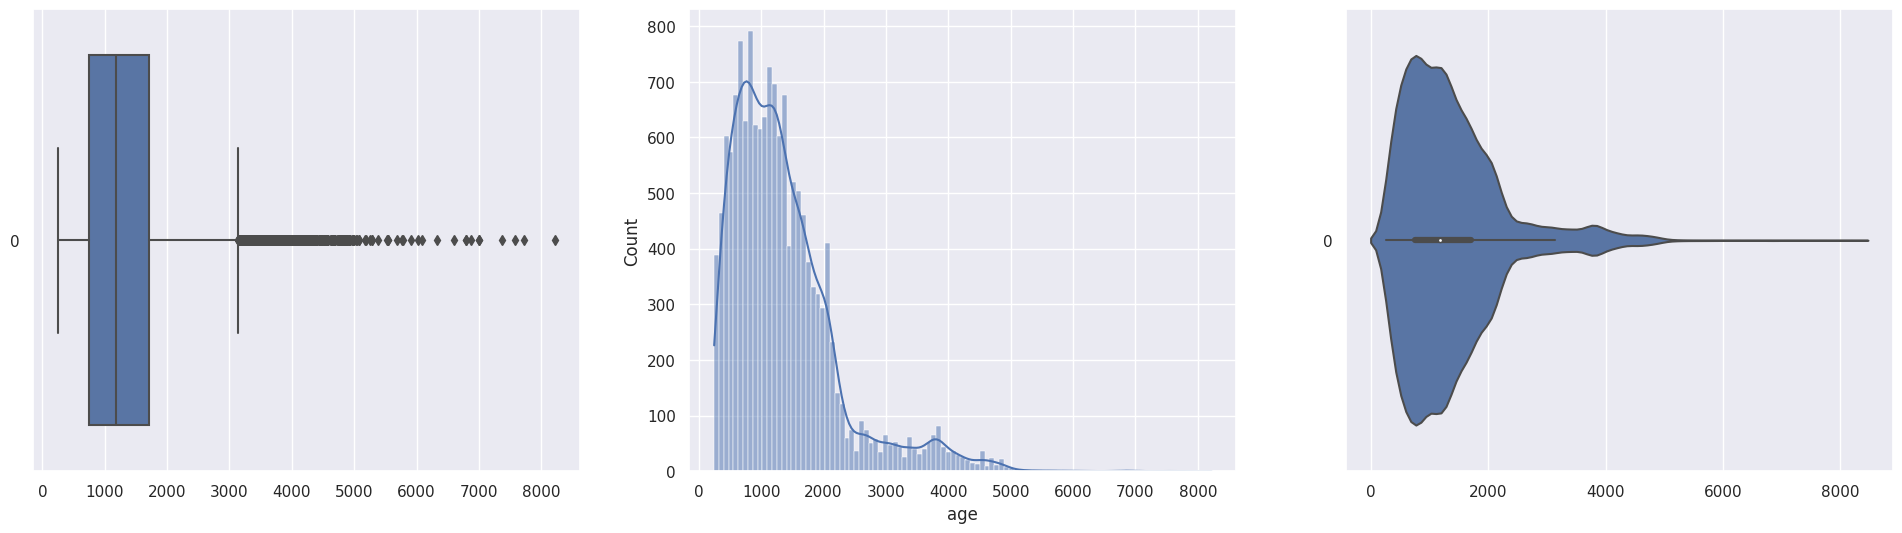

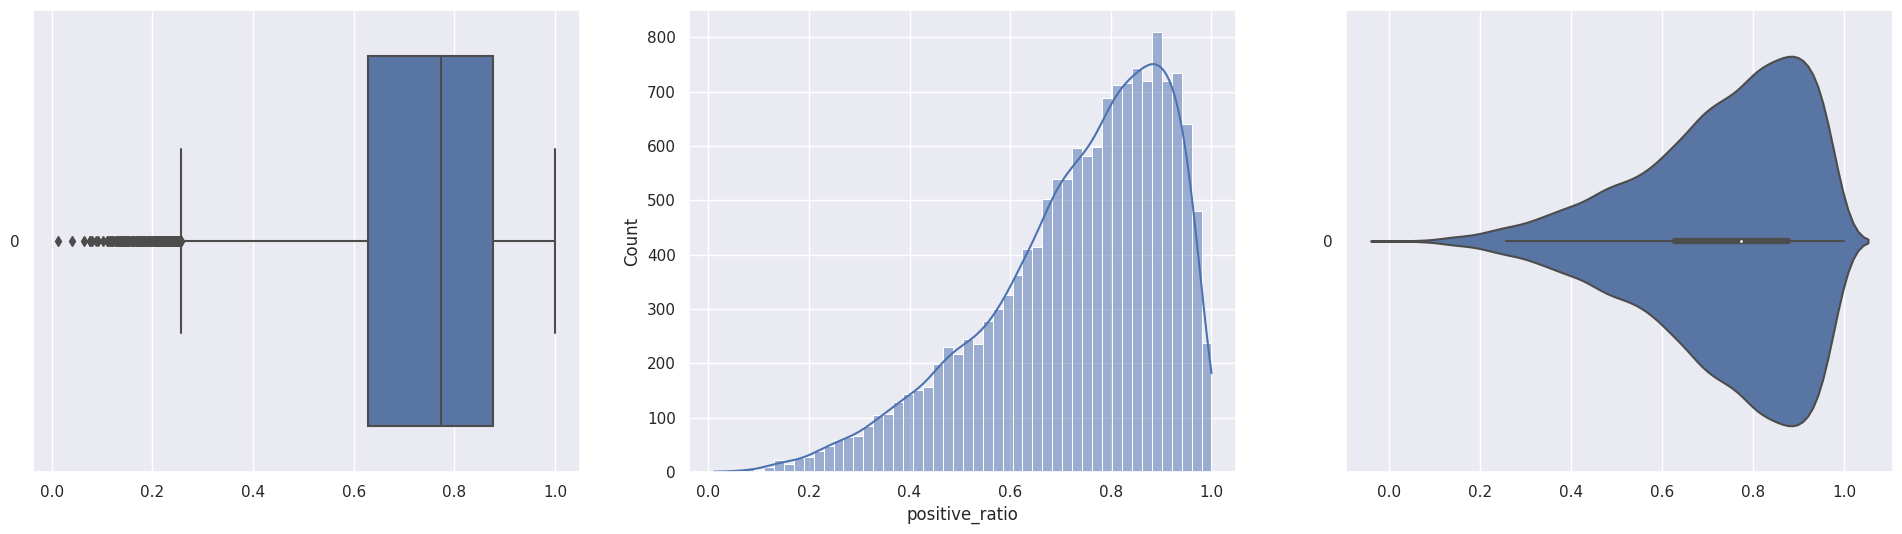

In [39]:
for var in dataNum:
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures for each variable
    sb.boxplot(data = dataNum[var], orient = "h", ax = axes[0])
    sb.histplot(data = dataNum[var], kde = True, ax = axes[1])
    sb.violinplot(data = dataNum[var], orient = "h", ax = axes[2])

In [40]:
dataNum.skew()

achievements        11.773344
average_playtime    45.757867
median_playtime     49.921036
owners              52.653771
price                3.156798
age                  1.721937
positive_ratio      -0.867726
dtype: float64

Some of the data is skewed. Find the number of outliers.

In [41]:
# Calculate the quartiles
Q1 = dataNum.quantile(0.25)
Q3 = dataNum.quantile(0.75)
IQR = Q3 - Q1

# Rule to identify outliers
rule = ((dataNum < (Q1 - (1.5 * IQR))) | (dataNum > (Q3 + (1.5 * IQR))))

# Count the number of outliers
rule.sum()

achievements         820
average_playtime    1484
median_playtime     1471
owners              2288
price                788
age                  832
positive_ratio       221
dtype: int64

In [42]:
def remove_outliers(data):
    data_removeoutliers = data[(data >= Q1 - (1.5 * IQR)) & (data <= Q3 + (1.5 * IQR))]
    return data_removeoutliers

In [43]:
dataNum_removeoutliers = remove_outliers(dataNum)
dataNum_removeoutliers

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
0,0.0,NaN,317.0,NaN,7.19,NaN,0.973888
1,0.0,277.0,62.0,NaN,3.99,NaN,0.839787
2,0.0,187.0,34.0,NaN,3.99,NaN,0.895648
3,0.0,258.0,184.0,NaN,3.99,NaN,0.826623
4,0.0,NaN,NaN,NaN,3.99,NaN,0.947996
...,...,...,...,...,...,...,...
15035,12.0,0.0,0.0,10000.0,7.19,260.0,0.714286
15036,7.0,0.0,0.0,10000.0,0.00,260.0,0.846939
15037,0.0,0.0,0.0,35000.0,0.00,265.0,0.776923
15038,23.0,0.0,0.0,10000.0,6.10,257.0,0.733333


In [44]:
dataNum_removeoutliers.skew()

achievements        1.091386
average_playtime    1.774143
median_playtime     1.767206
owners              1.644077
price               0.863089
age                 0.663382
positive_ratio     -0.718343
dtype: float64

In [45]:
dataNum_removeoutliers.describe()

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
count,14220.000000,13556.000000,13569.000000,12752.000000,14252.000000,14208.000000,14819.000000
mean,15.826020,48.824948,50.555457,38597.082811,5.783908,1204.961571,0.742752
std,17.924527,93.788744,97.023830,43937.229139,4.998357,604.883141,0.169251
min,0.000000,0.000000,0.000000,10000.000000,0.000000,245.000000,0.257143
25%,0.000000,0.000000,0.000000,10000.000000,1.690000,720.000000,0.637931
50%,11.000000,0.000000,0.000000,10000.000000,4.790000,1135.000000,0.776286
75%,26.000000,32.000000,34.000000,35000.000000,7.990000,1598.000000,0.878877
max,75.000000,362.000000,372.000000,150000.000000,21.990000,3137.000000,1.000000


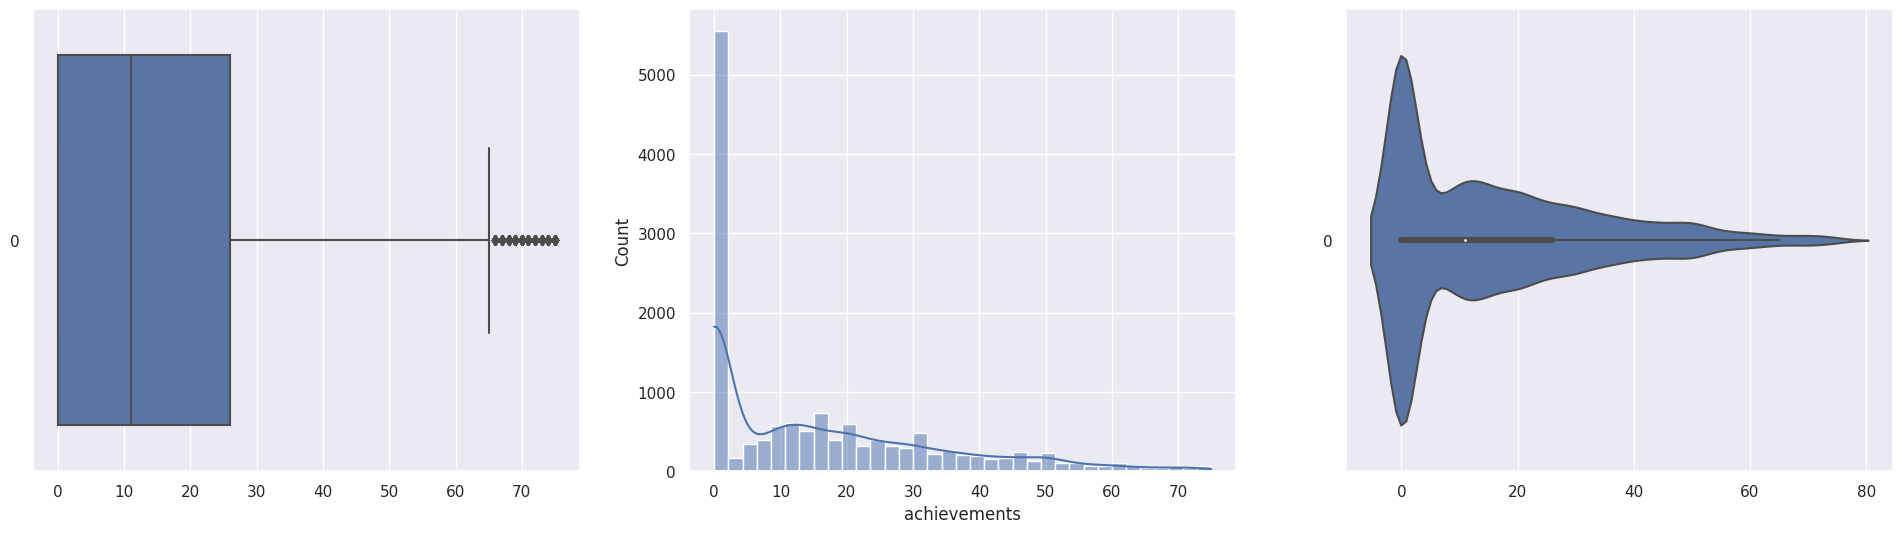

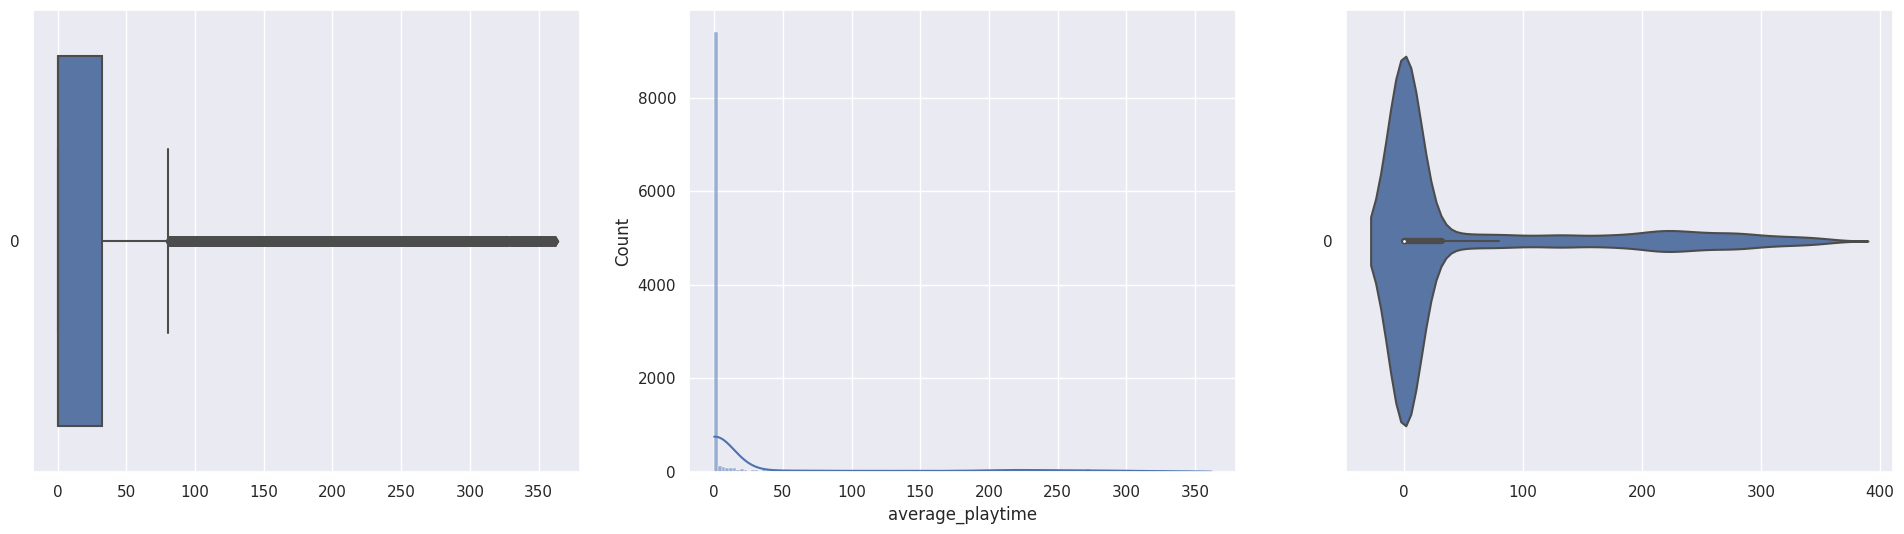

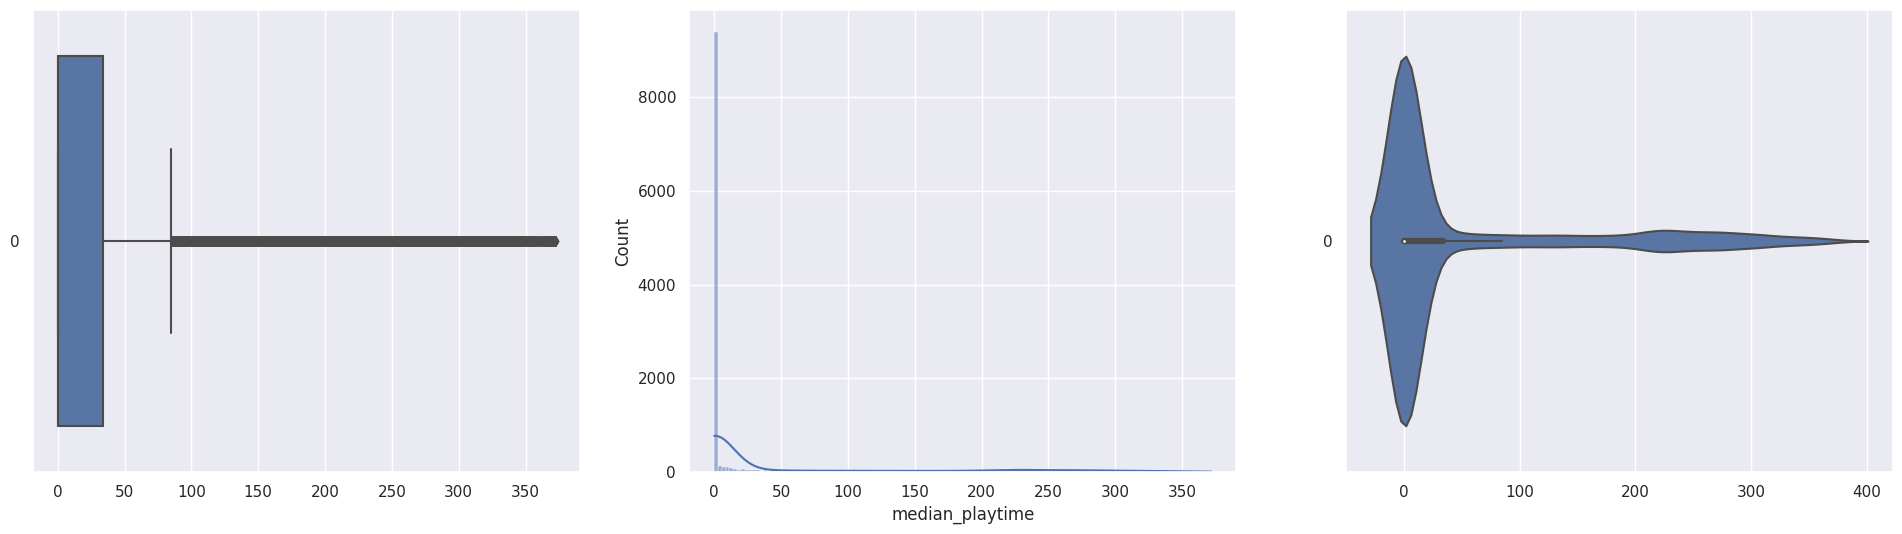

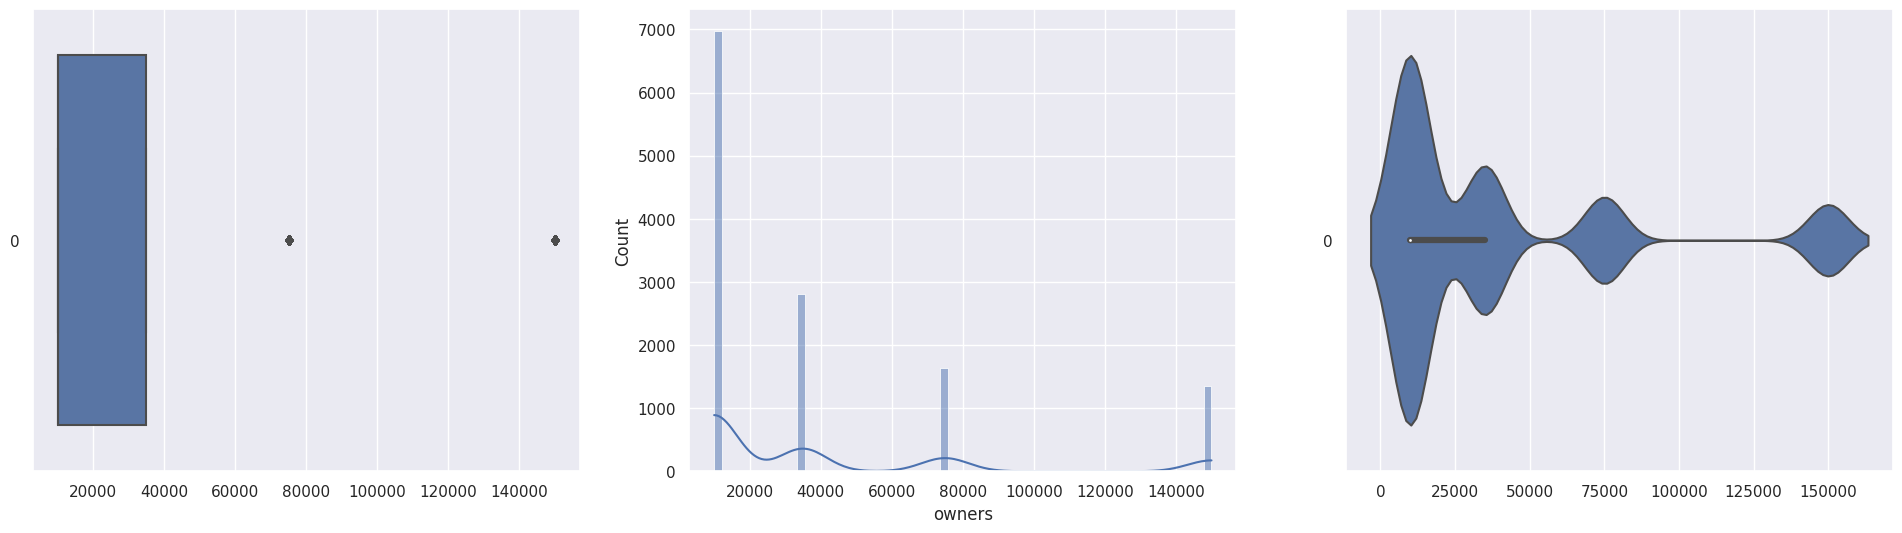

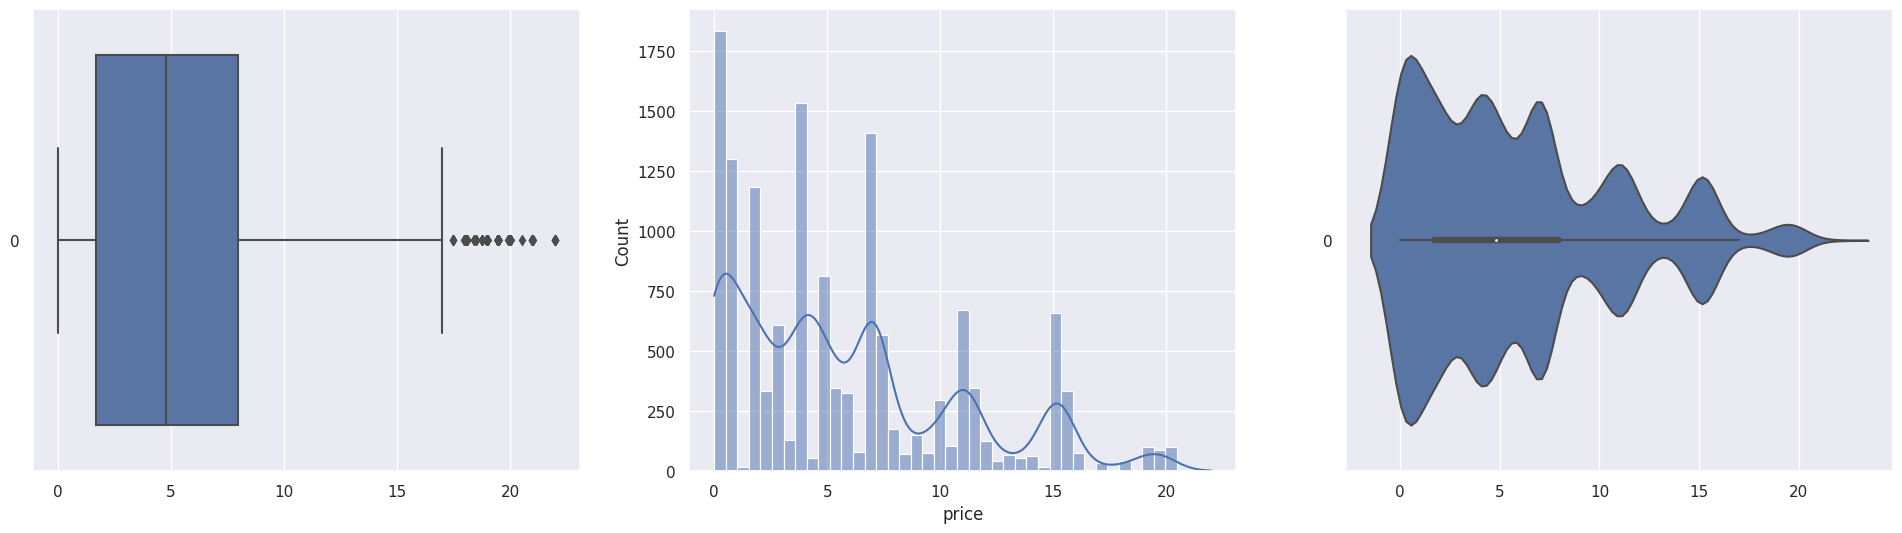

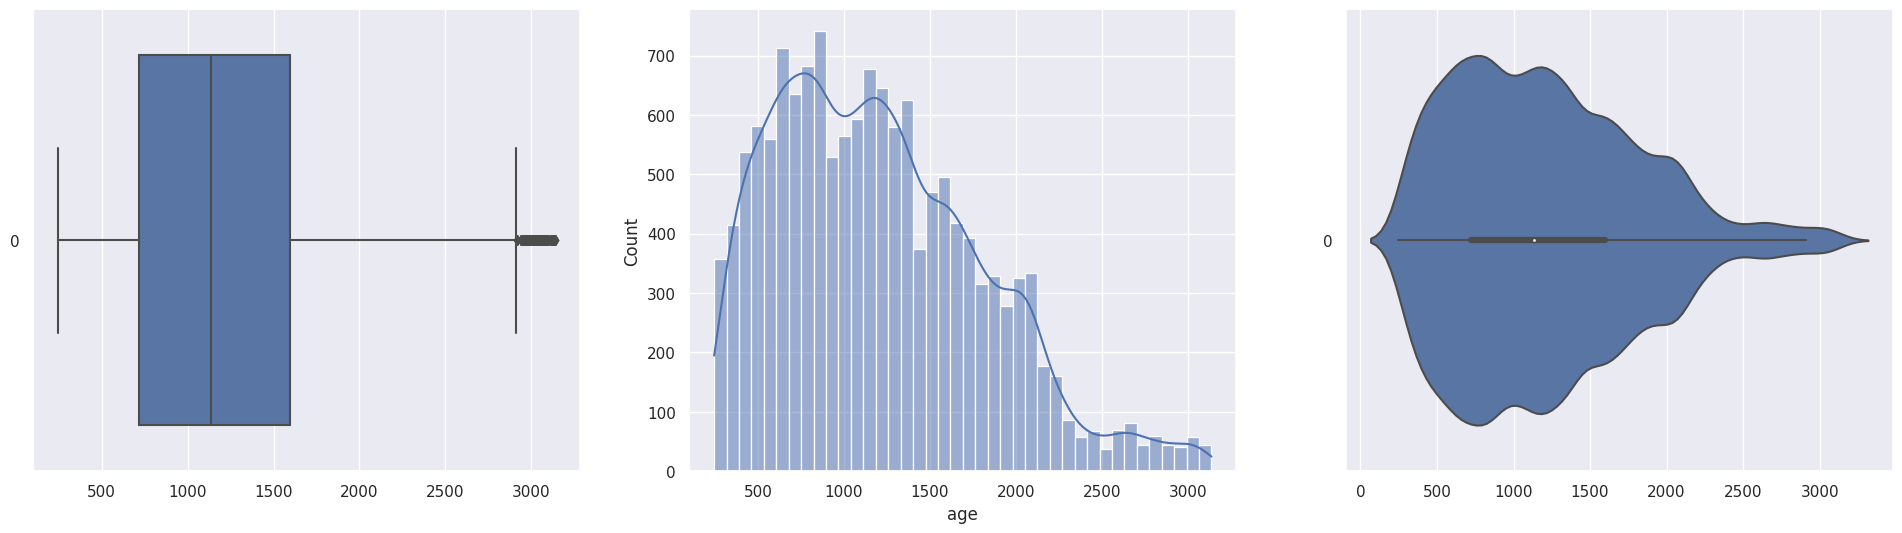

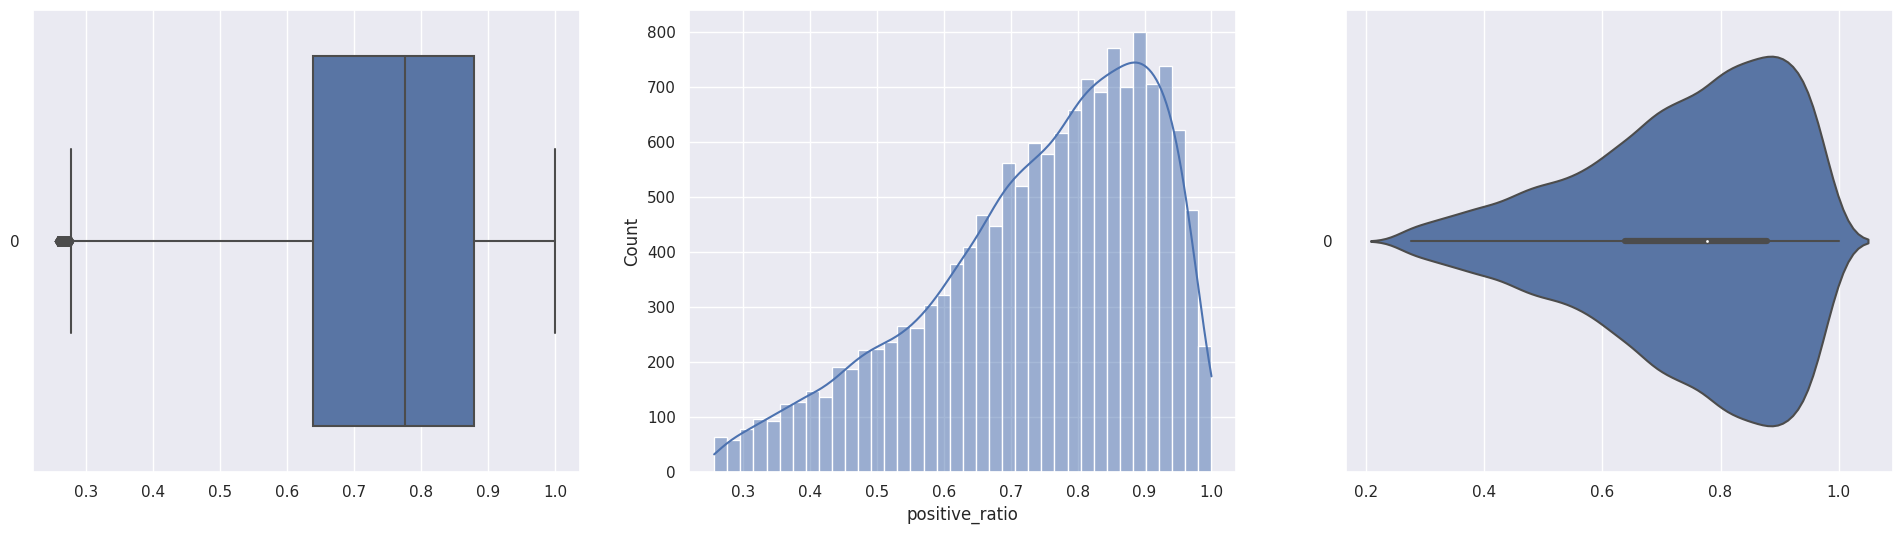

In [46]:
for var in dataNum_removeoutliers:
    # Set up matplotlib figure with three subplots
    f, axes = plt.subplots(1, 3, figsize=(24, 6))

    # Plot the basic uni-variate figures for each variable
    sb.boxplot(data = dataNum_removeoutliers[var], orient = "h", ax = axes[0])
    sb.histplot(data = dataNum_removeoutliers[var], kde = True, ax = axes[1])
    sb.violinplot(data = dataNum_removeoutliers[var], orient = "h", ax = axes[2])

With the outliers removed, skew has decreased.

---

### Bi-Variate Analysis

`price` is the dependent variable and the other variables are the independent variables.

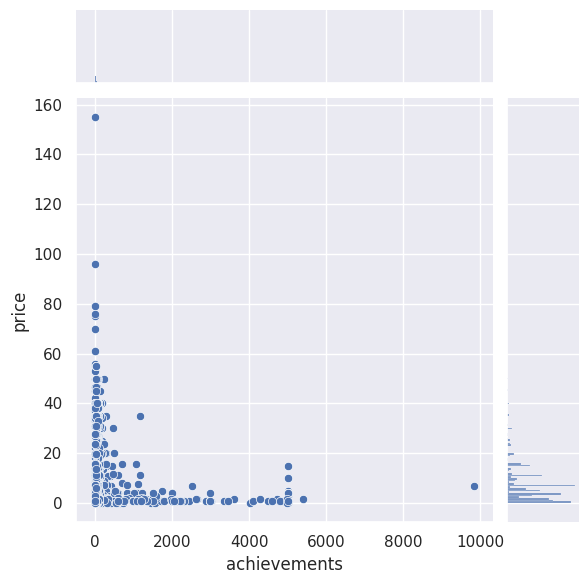

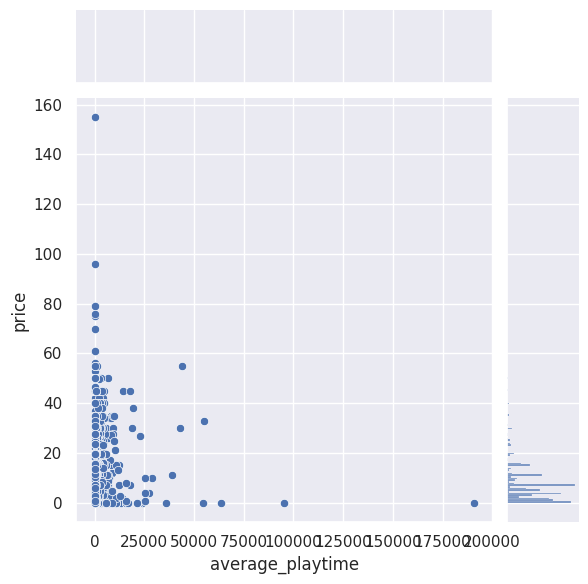

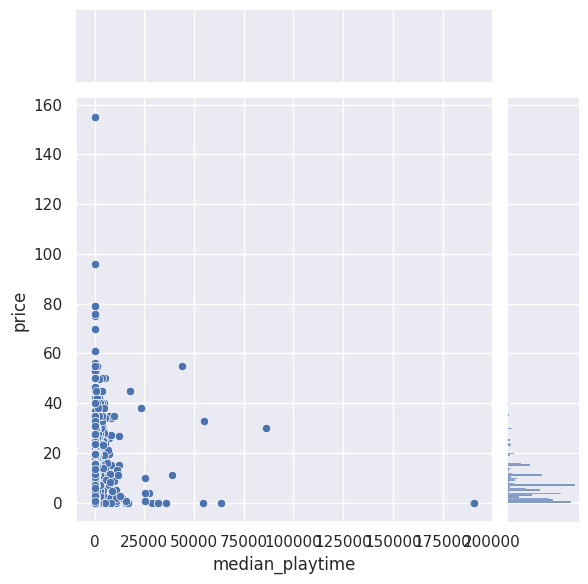

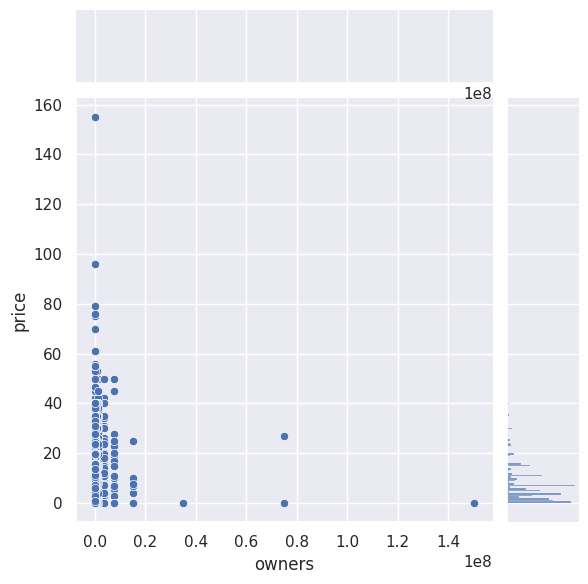

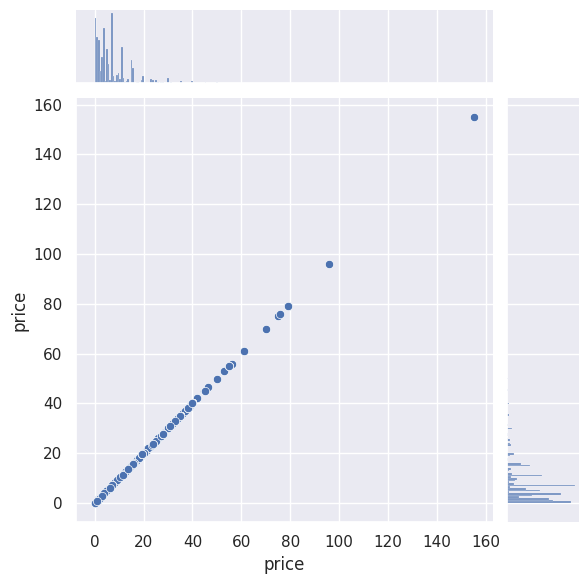

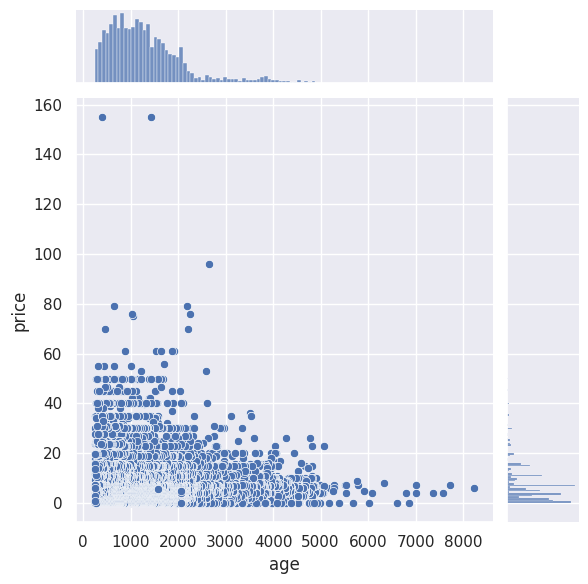

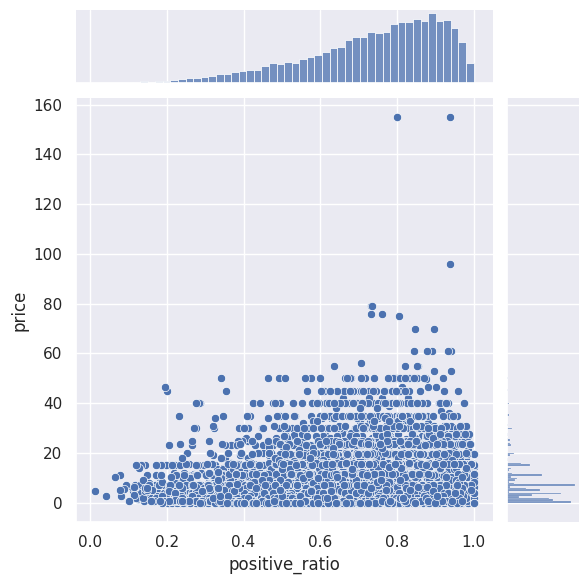

In [47]:
for var in dataNum:
    # Draw jointplot of price against each of the other variables
    sb.jointplot(data = dataNum, x = var, y = "price", height = 6)

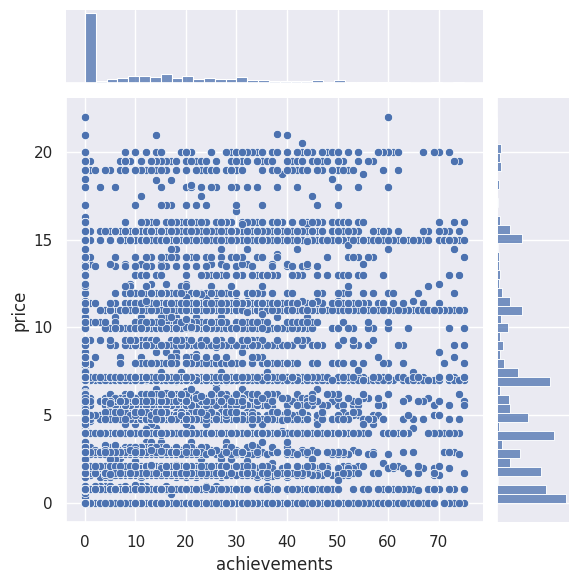

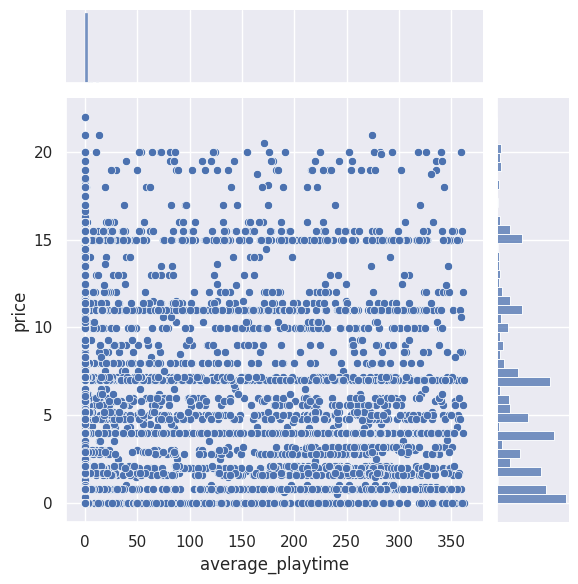

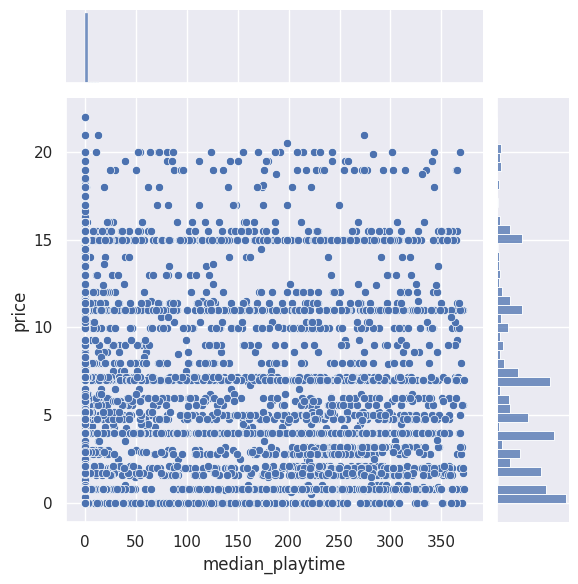

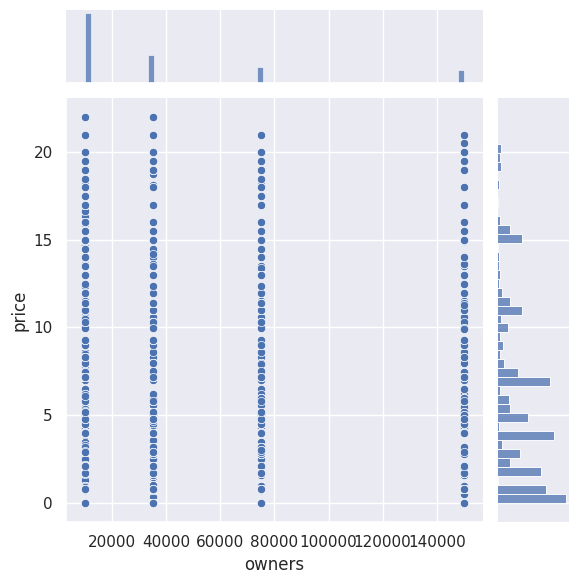

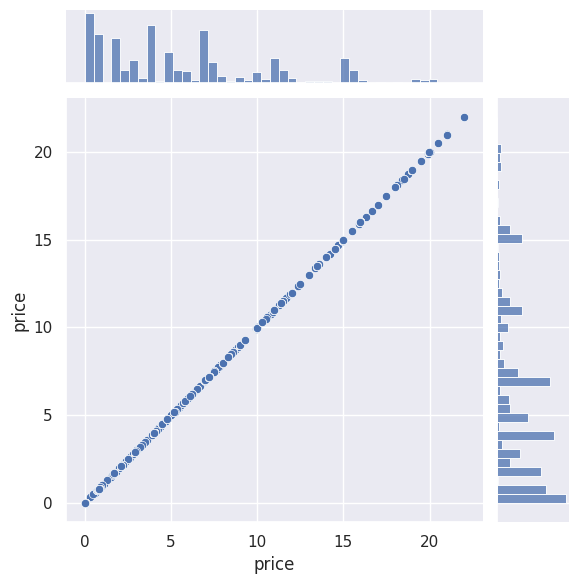

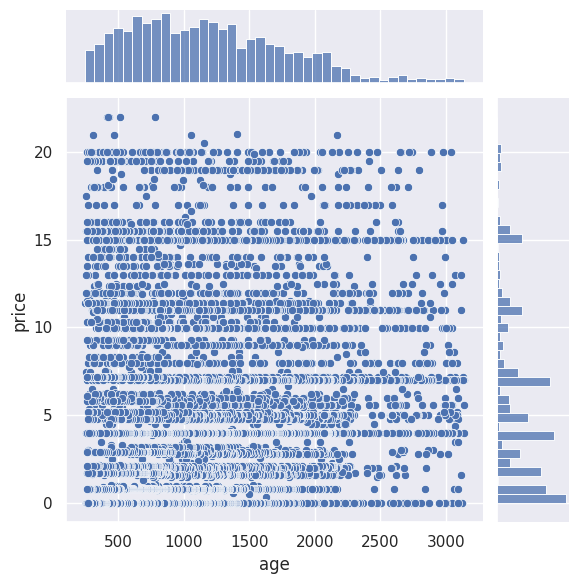

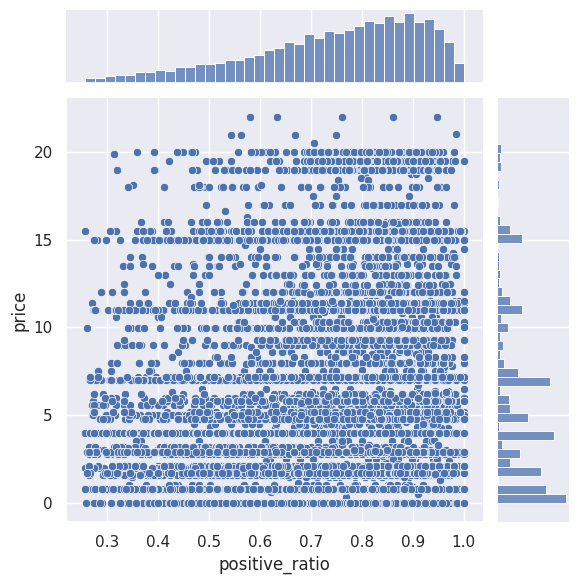

In [48]:
for var in dataNum_removeoutliers:
    # Draw jointplot of positive_ration against each of the other variables
    sb.jointplot(data = dataNum_removeoutliers, x = var, y = "price", height = 6)

In [49]:
# Calculate the correlation
dataNum.corr()

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
achievements,1.000000,0.013422,0.009362,0.000009,-0.028978,-0.063914,-0.061163
average_playtime,0.013422,1.000000,0.913311,0.171088,0.051796,0.032560,0.023659
median_playtime,0.009362,0.913311,1.000000,0.032450,0.038650,0.018938,0.014218
owners,0.000009,0.171088,0.032450,1.000000,0.025433,0.131668,0.046701
price,-0.028978,0.051796,0.038650,0.025433,1.000000,-0.015599,0.112798
age,-0.063914,0.032560,0.018938,0.131668,-0.015599,1.000000,-0.017908
positive_ratio,-0.061163,0.023659,0.014218,0.046701,0.112798,-0.017908,1.000000


In [50]:
dataNum_removeoutliers.corr()

,achievements,average_playtime,median_playtime,owners,price,age,positive_ratio
achievements,1.000000,0.066519,0.065579,0.033219,0.252409,0.025336,0.161823
average_playtime,0.066519,1.000000,0.981342,0.431443,-0.018023,0.234178,-0.033684
median_playtime,0.065579,0.981342,1.000000,0.429031,-0.018678,0.241559,-0.028688
owners,0.033219,0.431443,0.429031,1.000000,-0.028784,0.301967,-0.031921
price,0.252409,-0.018023,-0.018678,-0.028784,1.000000,0.059894,0.168849
age,0.025336,0.234178,0.241559,0.301967,0.059894,1.000000,-0.067469
positive_ratio,0.161823,-0.033684,-0.028688,-0.031921,0.168849,-0.067469,1.000000


`achievements`, `average_playtime`, `median_playtime`, `owners`, `positive_ratio` and `age` have very weak correlation with `price`.

---

## Analysis of Categorical Variables  
Extract the categorical variables from the dataset.

In [51]:
dataCat = data.drop(['achievements', 'average_playtime', 'median_playtime', 'owners', 'price', 'age', 'positive_ratio', 'detailed_description'], axis = 1)
dataCat.head()

,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,...,genres_Web Publishing,genres_Education,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Fix the data types of the extracted variables to convert them to categorical.

In [52]:
dataCat = dataCat.astype('category')
dataCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15040 entries, 0 to 15039
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   platforms_windows                      15040 non-null  category
 1   platforms_mac                          15040 non-null  category
 2   platforms_linux                        15040 non-null  category
 3   categories_Multi-player                15040 non-null  category
 4   categories_Online Multi-Player         15040 non-null  category
 5   categories_Local Multi-Player          15040 non-null  category
 6   categories_Valve Anti-Cheat enabled    15040 non-null  category
 7   categories_Single-player               15040 non-null  category
 8   categories_Steam Cloud                 15040 non-null  category
 9   categories_Steam Achievements          15040 non-null  category
 10  categories_Steam Trading Cards         15040 non-null  cat

In [53]:
dataCat.describe()

,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,...,genres_Web Publishing,genres_Education,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing,genres_Accounting,genres_Documentary,genres_Tutorial
count,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040,...,15040,15040,15040,15040,15040,15040,15040,15040,15040,15040
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,1
top,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
freq,15037,9600,11388,12207,13364,14288,14947,14161,9941,9098,...,15020,15016,15020,14876,15026,15033,15031,15040,15040,15040


No games are in the `genres_Accounting`, `genres_Documentary` and `genres_Tutorial` genres. Drop them from the DataFrame.

In [54]:
dataCat = dataCat.drop(['genres_Accounting', 'genres_Documentary', 'genres_Tutorial'], axis = 1)
dataCat.head()

,platforms_windows,platforms_mac,platforms_linux,categories_Multi-player,categories_Online Multi-Player,categories_Local Multi-Player,categories_Valve Anti-Cheat enabled,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,...,genres_Gore,genres_Utilities,genres_Design & Illustration,genres_Web Publishing,genres_Education,genres_Software Training,genres_Sexual Content,genres_Audio Production,genres_Game Development,genres_Photo Editing
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize the counts across levels of a categorical variable using catplot.

/home/chanbakjsd/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


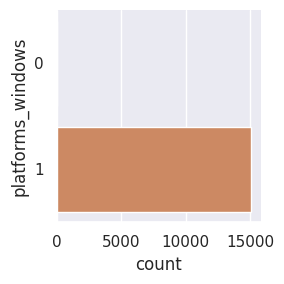

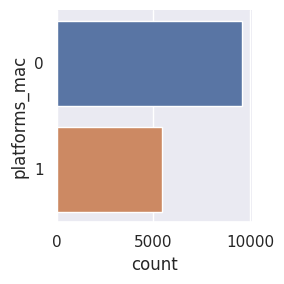

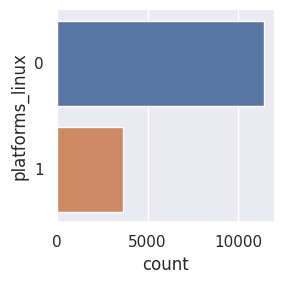

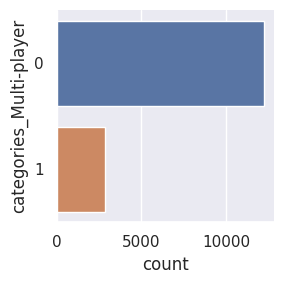

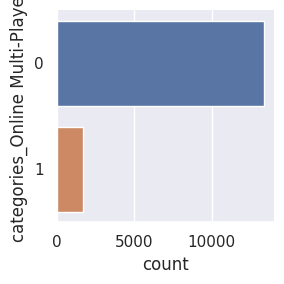

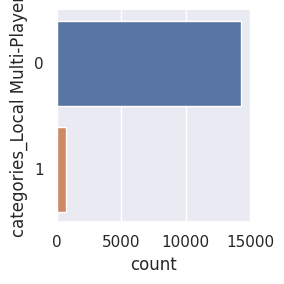

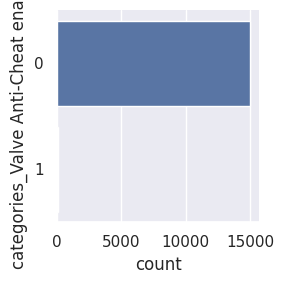

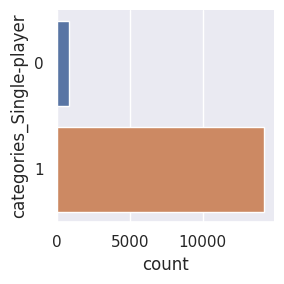

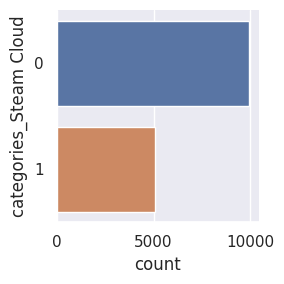

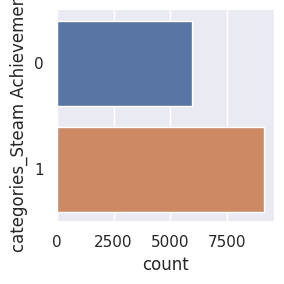

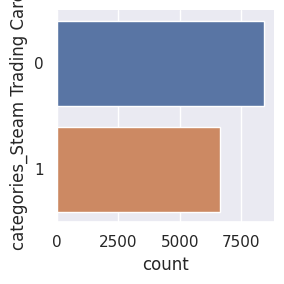

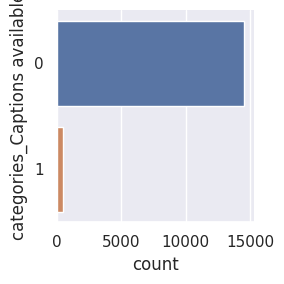

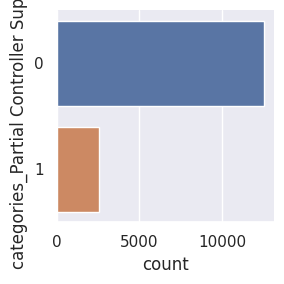

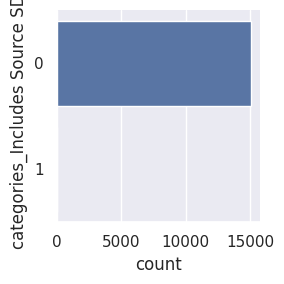

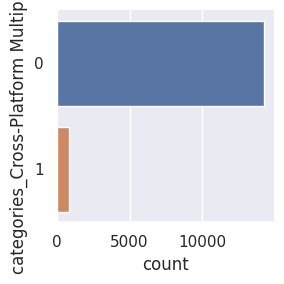

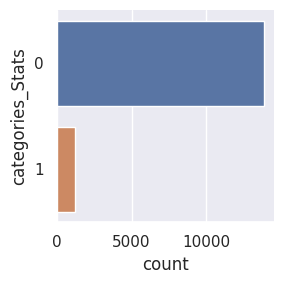

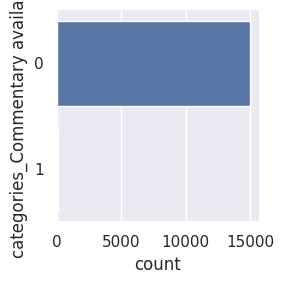

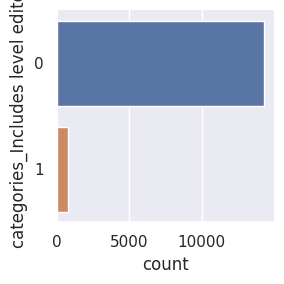

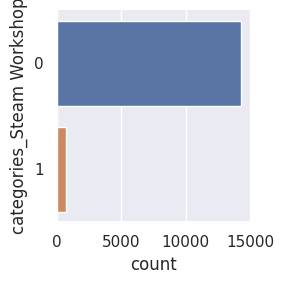

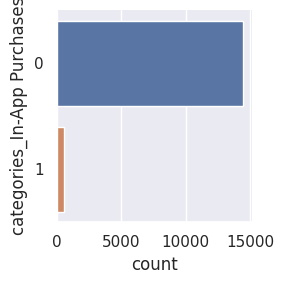

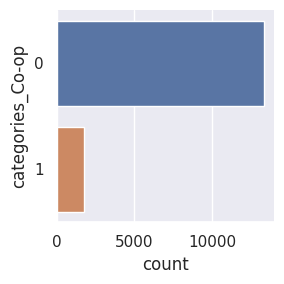

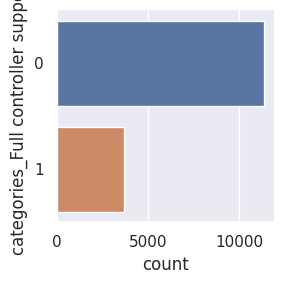

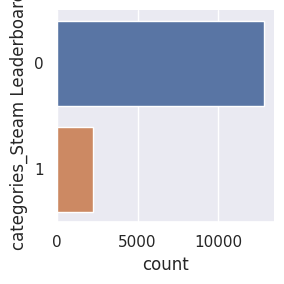

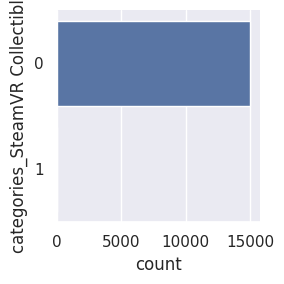

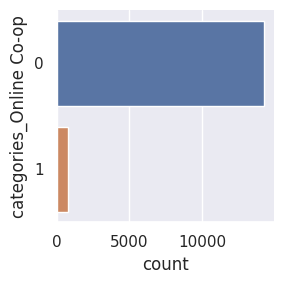

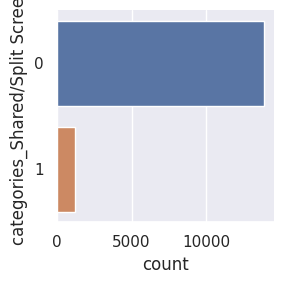

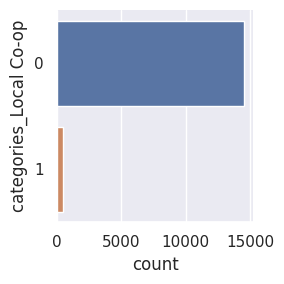

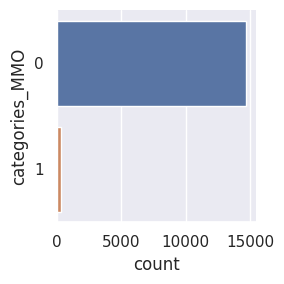

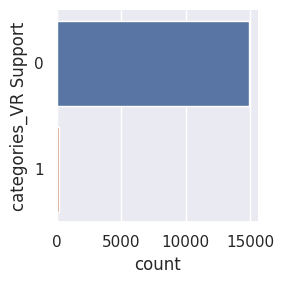

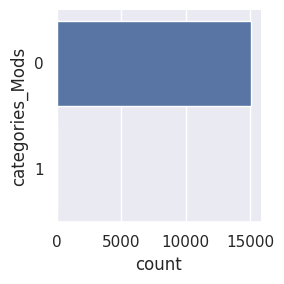

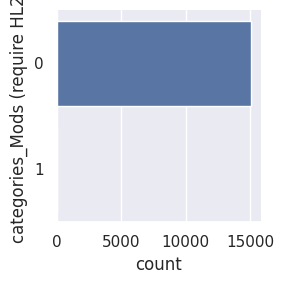

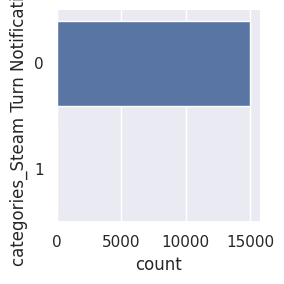

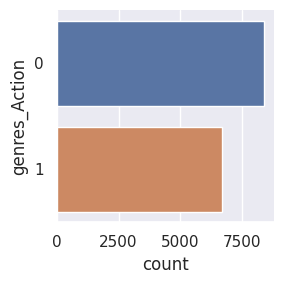

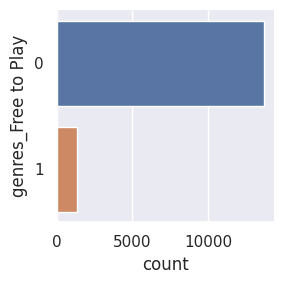

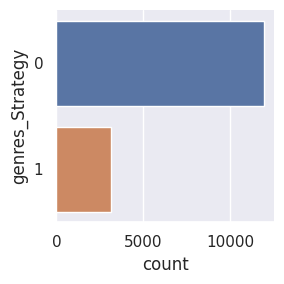

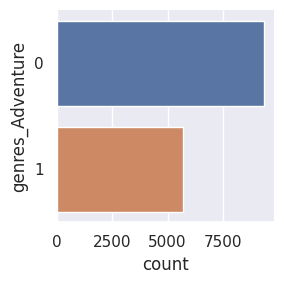

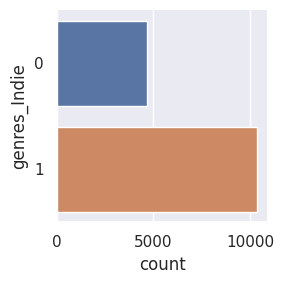

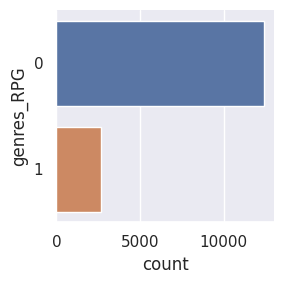

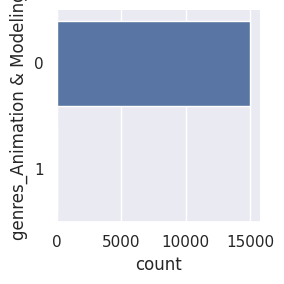

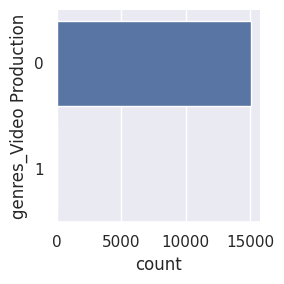

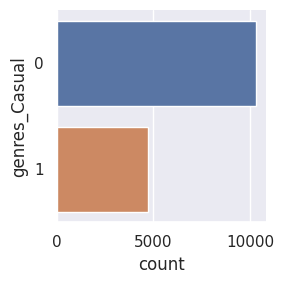

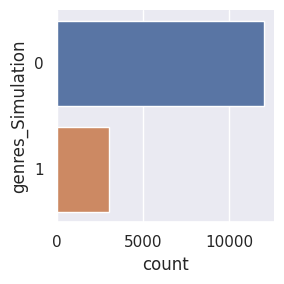

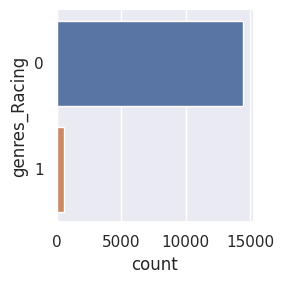

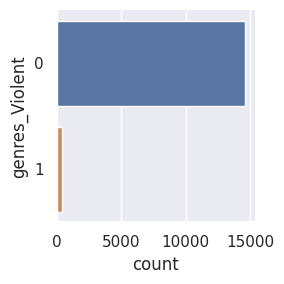

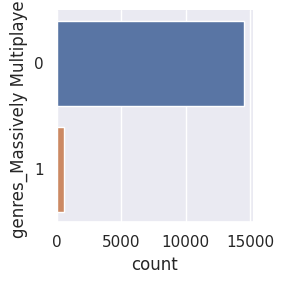

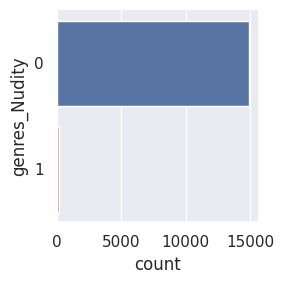

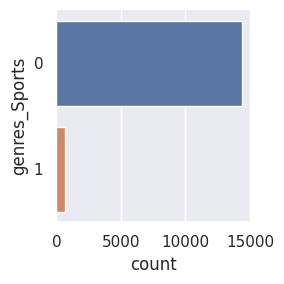

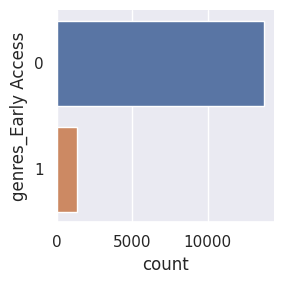

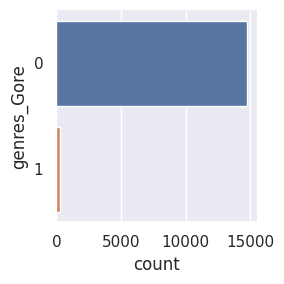

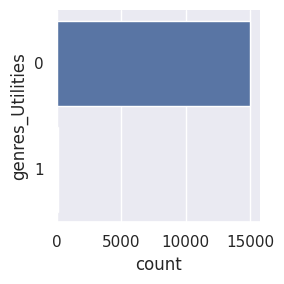

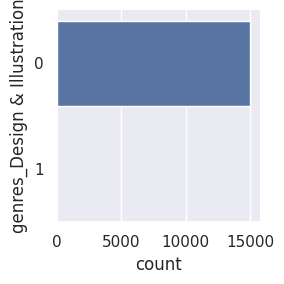

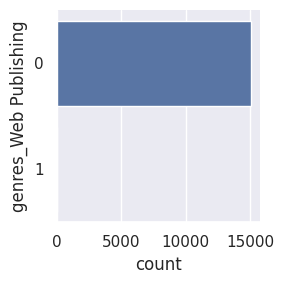

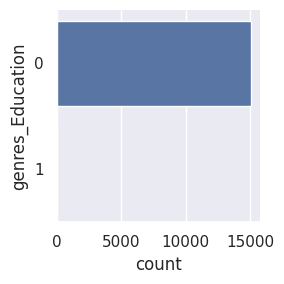

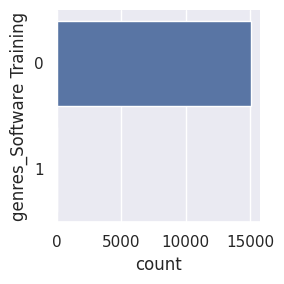

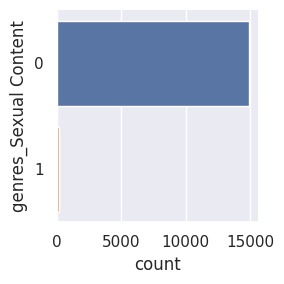

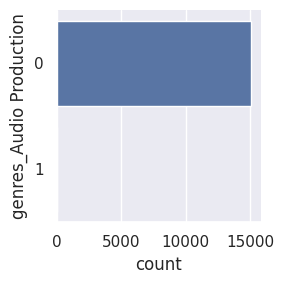

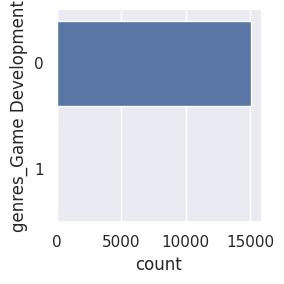

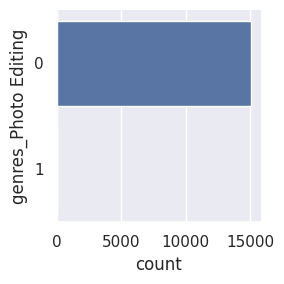

In [55]:
for var in dataCat:
    sb.catplot(y = var, data = dataCat, kind = "count", height = 3)
    dataCat[var].value_counts()

In [56]:
for var in dataCat:
    print(dataCat[var].value_counts(normalize=True), "\n")

platforms_windows
1    0.999801
0    0.000199
Name: proportion, dtype: float64 

platforms_mac
0    0.638298
1    0.361702
Name: proportion, dtype: float64 

platforms_linux
0    0.757181
1    0.242819
Name: proportion, dtype: float64 

categories_Multi-player
0    0.811636
1    0.188364
Name: proportion, dtype: float64 

categories_Online Multi-Player
0    0.888564
1    0.111436
Name: proportion, dtype: float64 

categories_Local Multi-Player
0    0.95
1    0.05
Name: proportion, dtype: float64 

categories_Valve Anti-Cheat enabled
0    0.993816
1    0.006184
Name: proportion, dtype: float64 

categories_Single-player
1    0.941556
0    0.058444
Name: proportion, dtype: float64 

categories_Steam Cloud
0    0.660971
1    0.339029
Name: proportion, dtype: float64 

categories_Steam Achievements
1    0.60492
0    0.39508
Name: proportion, dtype: float64 

categories_Steam Trading Cards
0    0.559109
1    0.440891
Name: proportion, dtype: float64 

categories_Captions available
0    0.96

Some categories have almost all games in either 0 (game is in that category) or 1 (game is not in that category). Extract only the variables that have noticable distribution (at most 0.95:0.5 split). Some categories are subsets of other categories. Drop them from the DataFrame.

In [57]:
dataCat = pd.DataFrame(dataCat[['platforms_mac', 'platforms_linux', 'categories_Multi-player', 'categories_Single-player', 
                                'categories_Steam Cloud', 'categories_Steam Achievements', 'categories_Steam Trading Cards',
                                'categories_Partial Controller Support', 'categories_Stats', 'categories_Includes level editor',
                                'categories_Co-op', 'categories_Full controller support', 'categories_Steam Leaderboards', 
                                'genres_Action', 'genres_Free to Play', 'genres_Strategy', 'genres_Adventure', 'genres_Indie', 
                                'genres_RPG', 'genres_Casual', 'genres_Simulation', 'genres_Sports', 'genres_Early Access']])
dataCat

,platforms_mac,platforms_linux,categories_Multi-player,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,categories_Steam Trading Cards,categories_Partial Controller Support,categories_Stats,categories_Includes level editor,...,genres_Action,genres_Free to Play,genres_Strategy,genres_Adventure,genres_Indie,genres_RPG,genres_Casual,genres_Simulation,genres_Sports,genres_Early Access
0,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15035,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
15036,0,0,0,1,1,1,0,0,0,0,...,1,1,0,1,1,0,0,0,0,0
15037,0,0,0,1,0,0,0,1,0,0,...,0,1,1,1,1,1,0,0,0,0
15038,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1


In [58]:
# Add price to the dataframe
dataCat = pd.concat([dataCat, data['price']], axis = 1).reindex(dataCat.index)
dataCat.head()

,platforms_mac,platforms_linux,categories_Multi-player,categories_Single-player,categories_Steam Cloud,categories_Steam Achievements,categories_Steam Trading Cards,categories_Partial Controller Support,categories_Stats,categories_Includes level editor,...,genres_Free to Play,genres_Strategy,genres_Adventure,genres_Indie,genres_RPG,genres_Casual,genres_Simulation,genres_Sports,genres_Early Access,price
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.19
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99
4,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.99


Check the distribution of `price` across different categories using box-plots.

/tmp/ipykernel_44887/2441285220.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(8, 6))


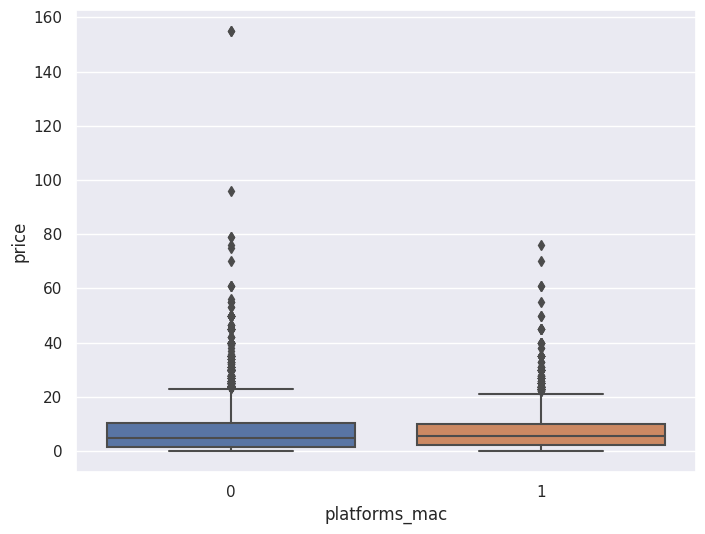

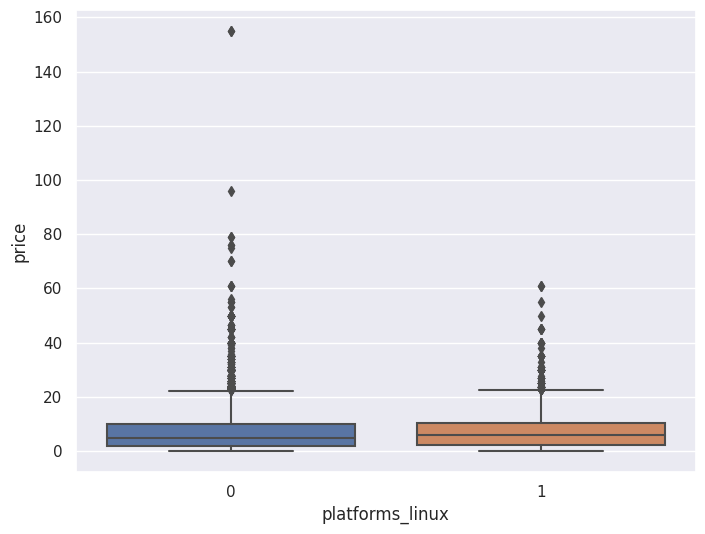

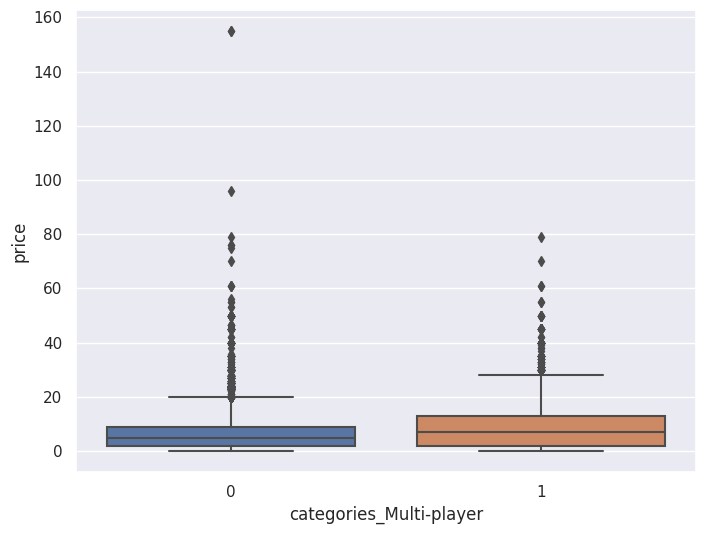

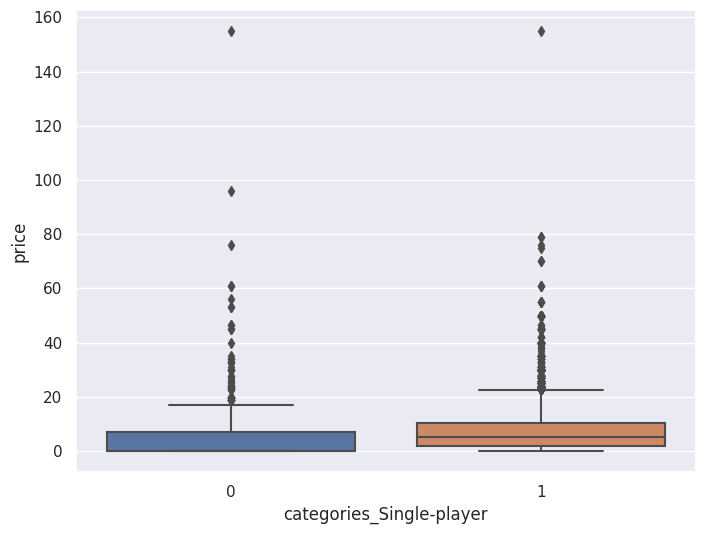

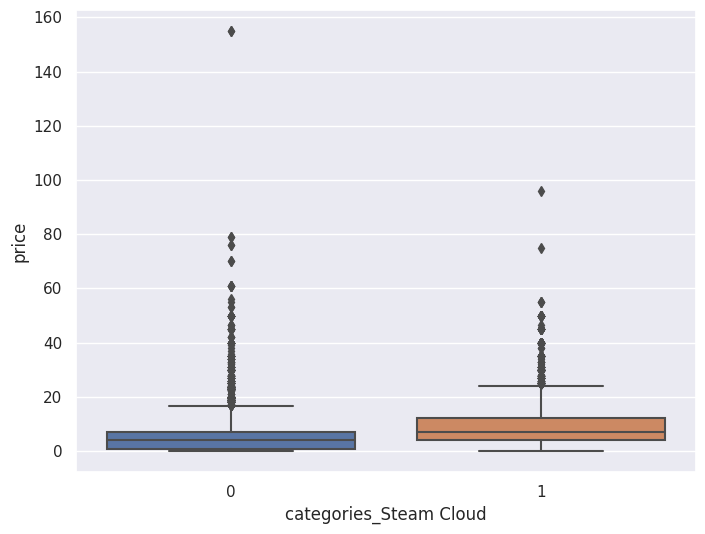

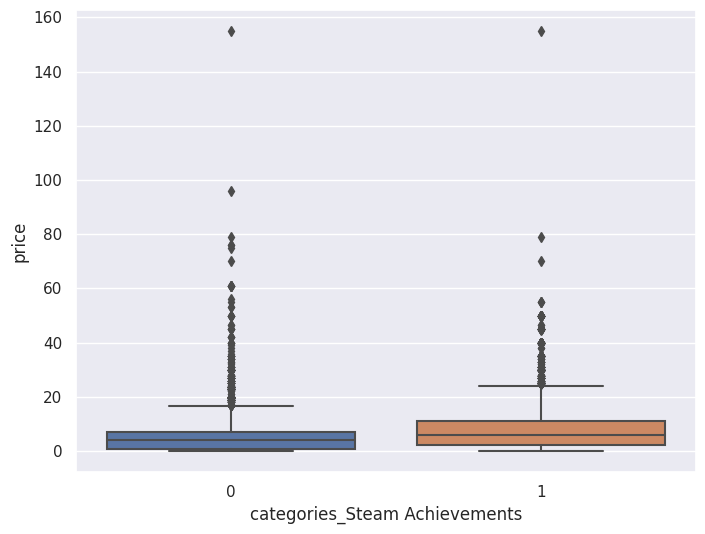

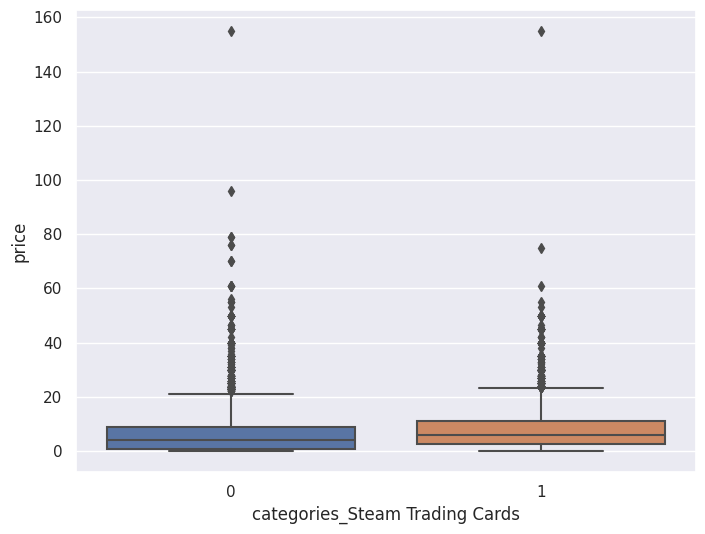

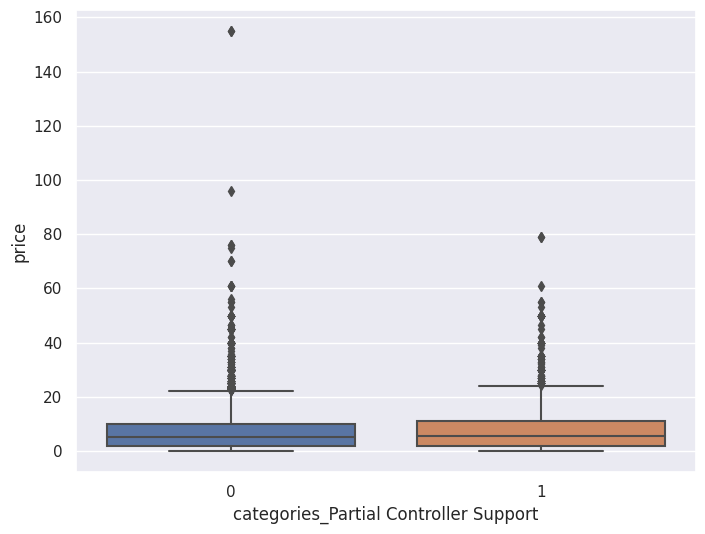

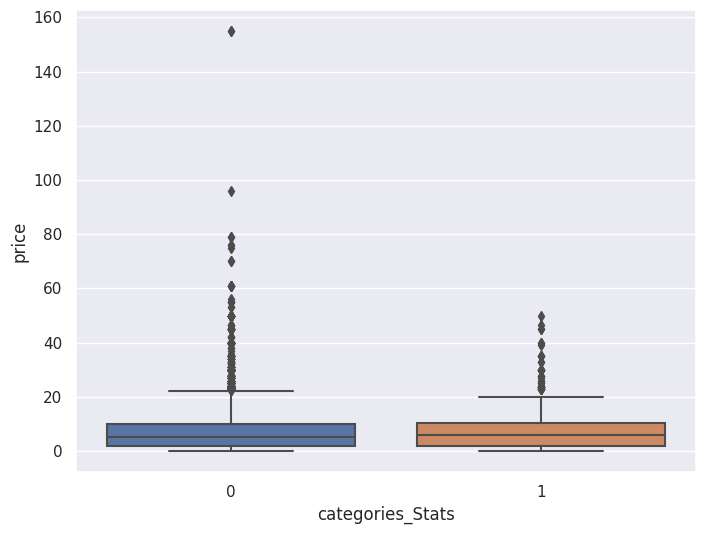

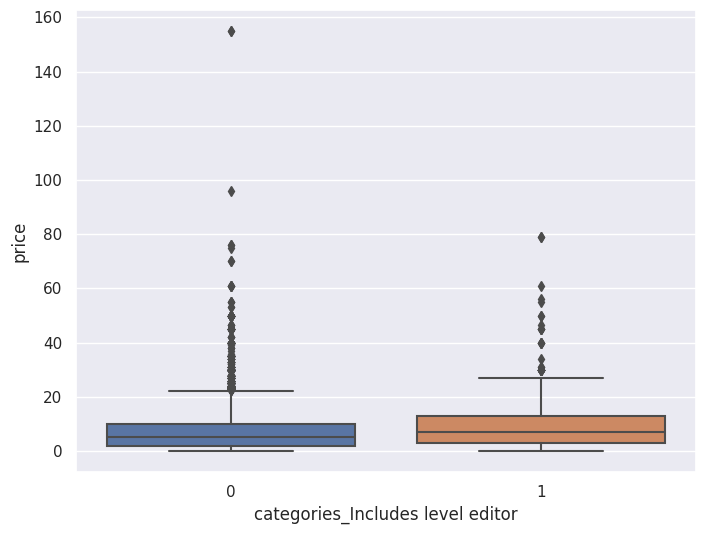

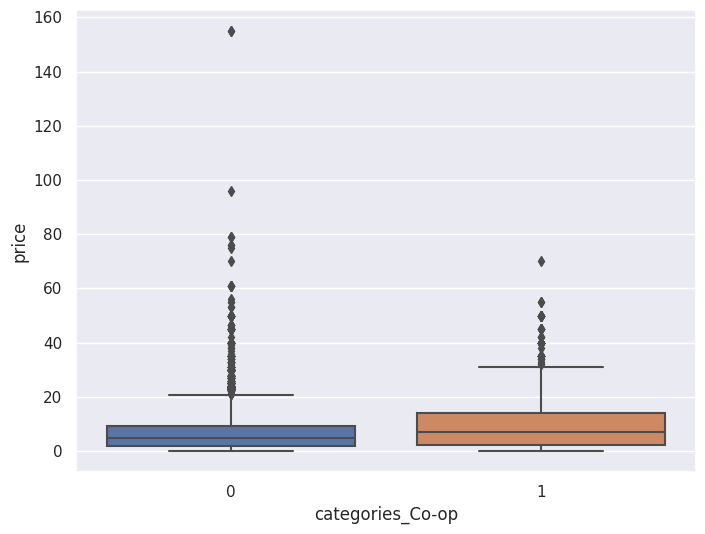

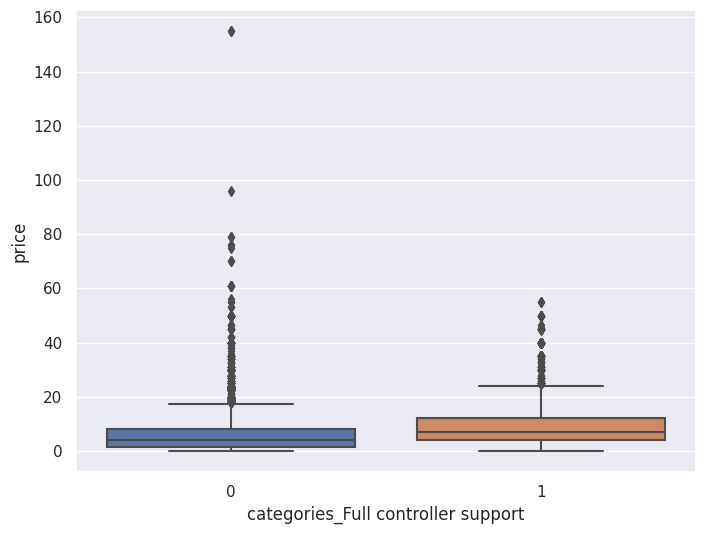

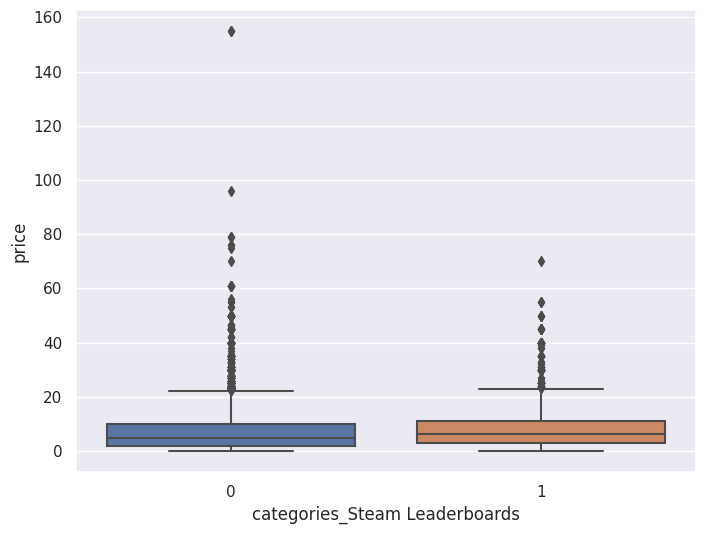

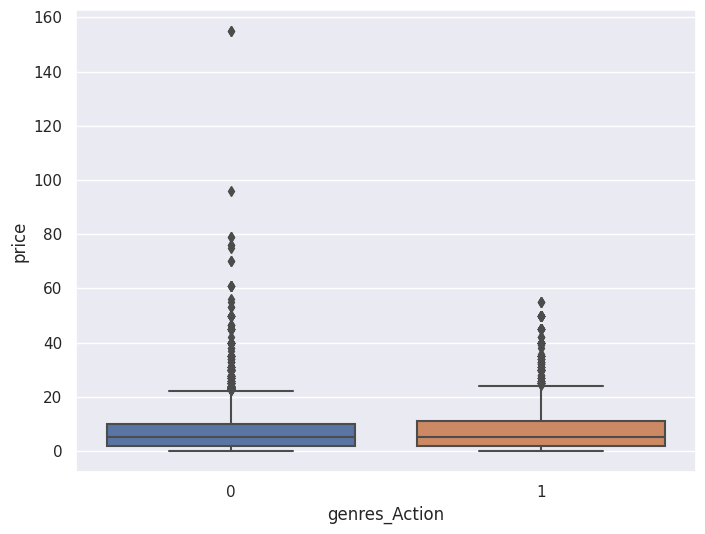

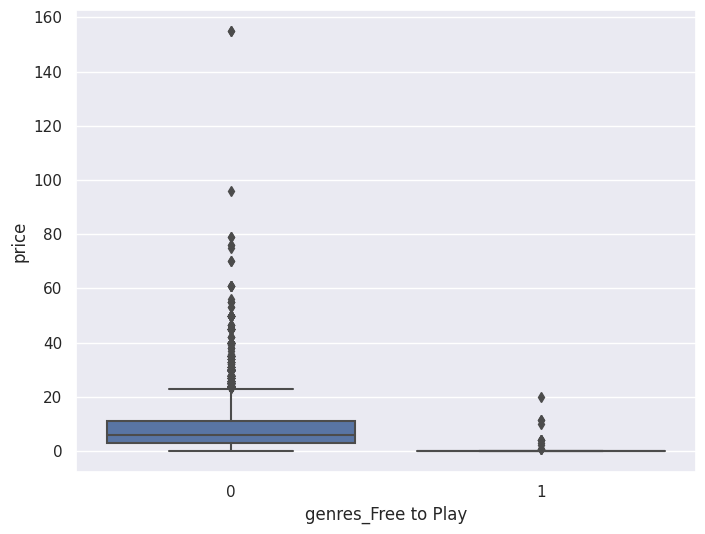

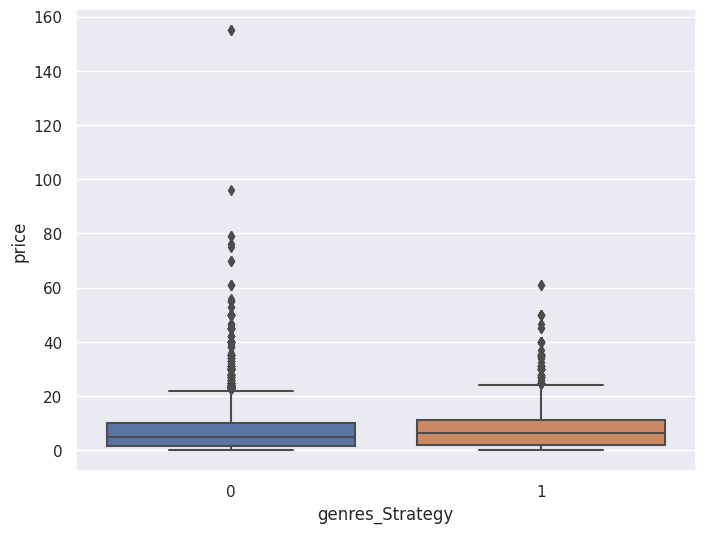

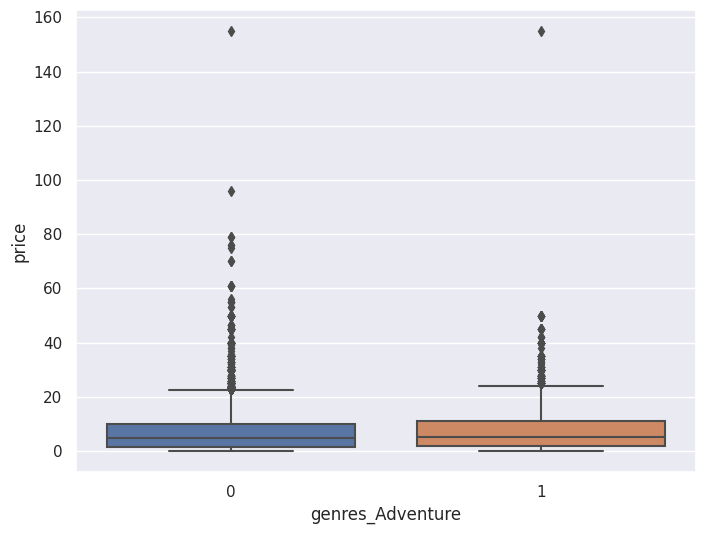

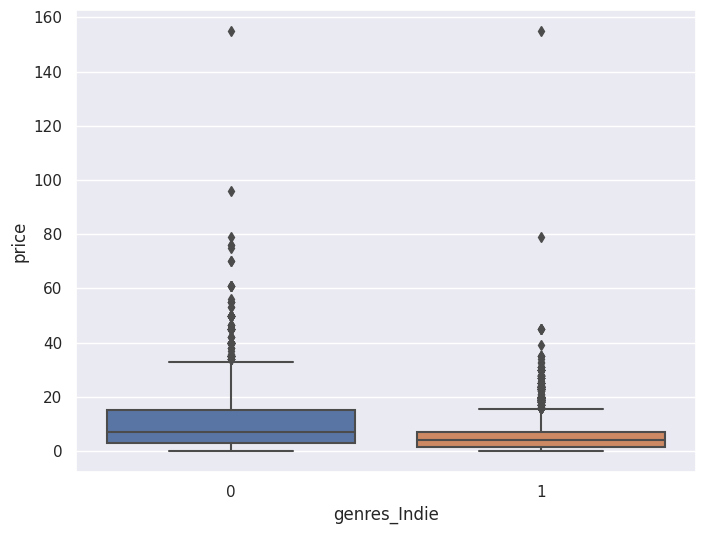

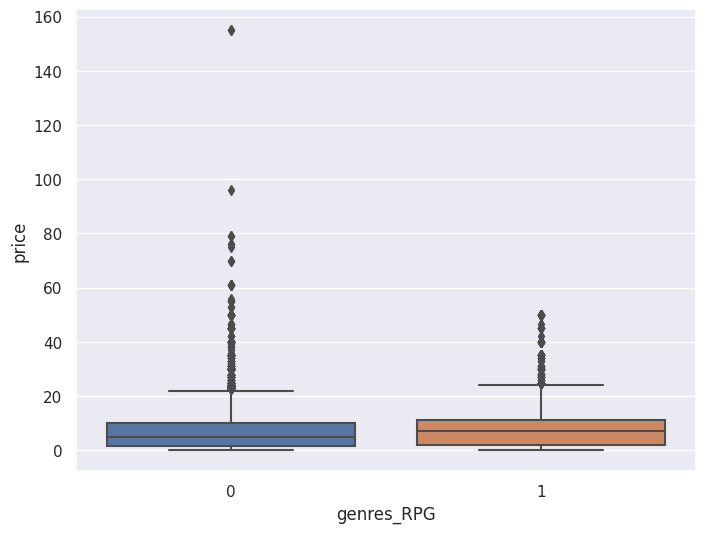

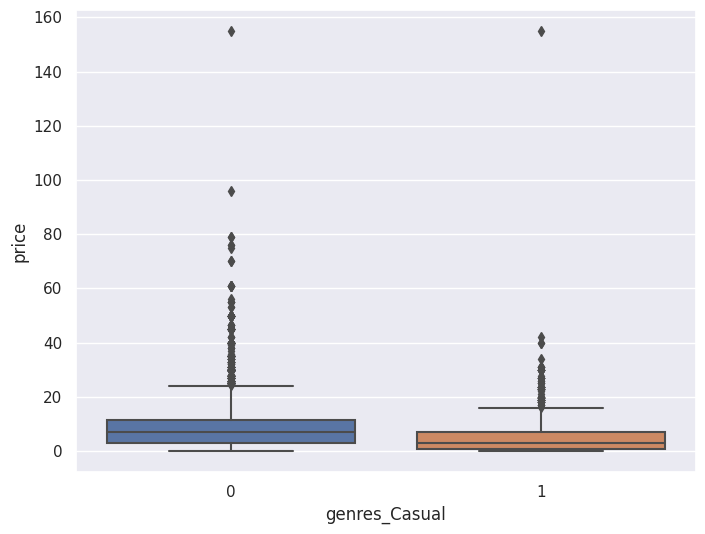

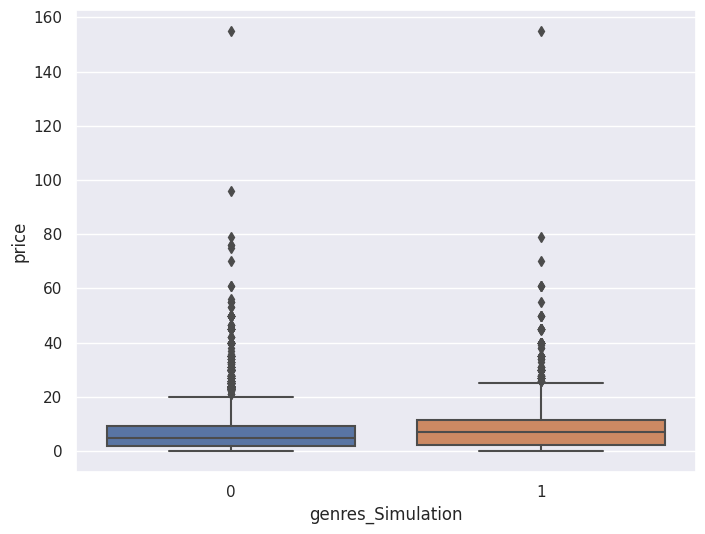

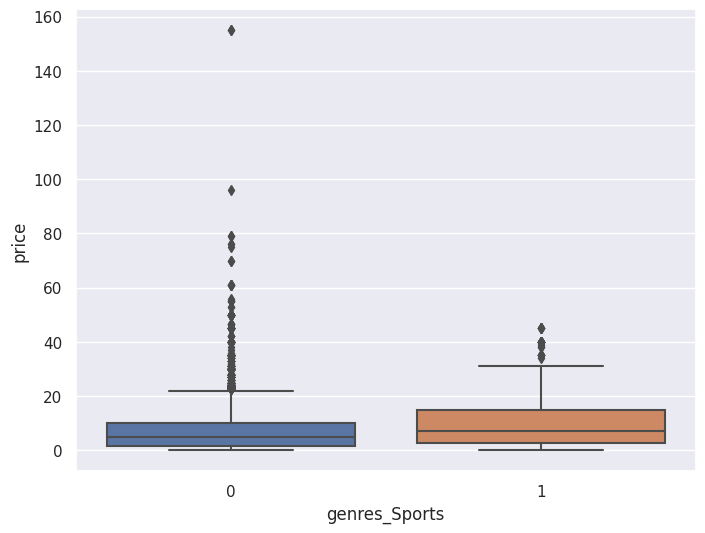

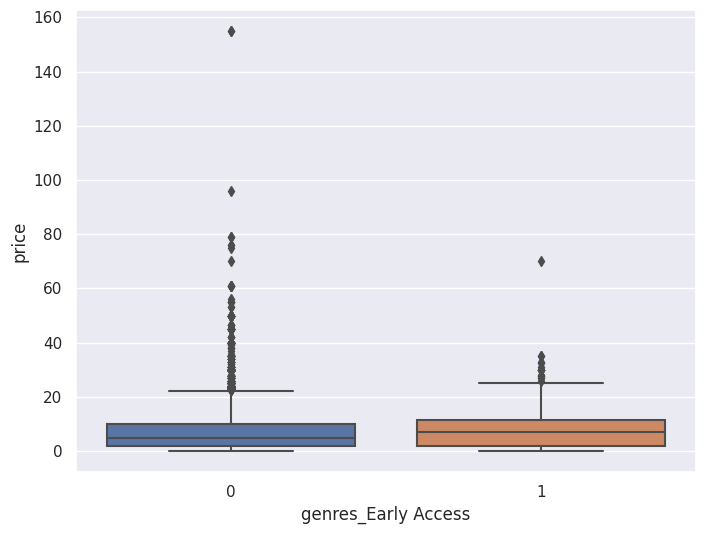

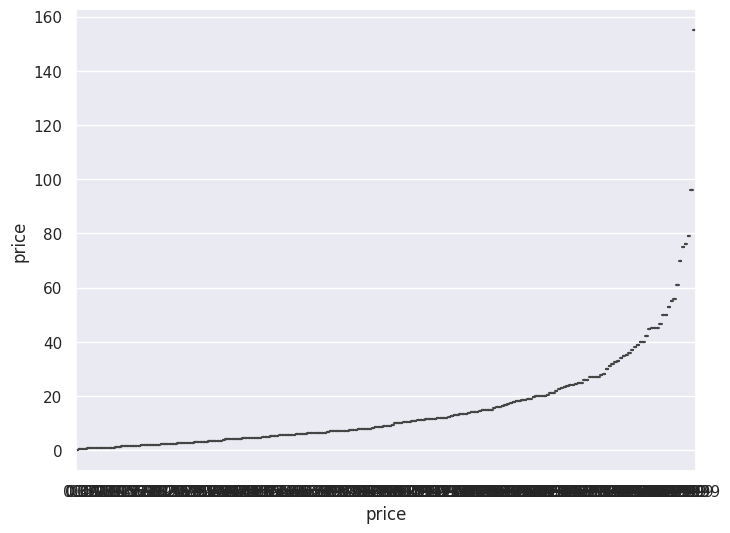

In [59]:
for var in dataCat:
    # Box-plot of positive_ratio against each of the other variables
    f = plt.figure(figsize=(8, 6))
    sb.boxplot(x = var, y = 'price', data = dataCat)